**Bikes & Cycling Accessories Organisation's Transactions Data Based Cohort Analysis**



# Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 1. Data Loading


In [3]:
df='/kaggle/input/kpmg-data/KPMG_VI_New_raw_data_update_final.xlsx'

In [4]:
#Load data from three table
transaction_df=pd.read_excel(df,'Transactions')
CustomerDemographic_df=pd.read_excel(df,'CustomerDemographic')
CustomerAddress_df=pd.read_excel(df,'CustomerAddress')

In [5]:
# Delete first row to make a standard dataframe
transaction_df.columns=transaction_df.iloc[0]
transaction_df.drop(index=transaction_df.index[0], axis=0, inplace=True)
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [6]:
CustomerAddress_df.columns=CustomerAddress_df.iloc[0]
CustomerAddress_df.drop(index=CustomerAddress_df.index[0],axis=0,inplace=True)
CustomerAddress_df.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
CustomerDemographic_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,U,59,1843-12-21,NaN,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,U,71,NaN,124.0,Environmental Tech,IT,Mass Customer,N,No,NaN
2,168,Reggie Broggetti,U,8,NaN,124.0,General Manager,IT,Affluent Customer,N,Yes,NaN
3,267,Edgar Buckler,U,53,NaN,124.0,NaN,IT,High Net Worth,N,No,NaN
4,290,Giorgio Kevane,U,42,NaN,124.0,Senior Sales Associate,IT,Mass Customer,N,No,NaN


# 2. EDA

**2.1 Data Cleaning**

In [8]:
#Counting the number of duplicate rows
transaction_df.duplicated().sum()

0

In [9]:
#transaction dataset description
transaction_df.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [10]:
# Data cleaning replace missing values
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB
None


In [11]:
transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

Drop the rows where columns 'brand','product_line','product_class', and 'product_size' are null, because those columns have the same number of missing values which means that it is possible for a row of data to be missing these columns at the same time. And 197 is a relatively small number of missing values compared to 20,000 total rows.

In [12]:
transaction_df.dropna(subset=['brand', 'product_line', 'product_class', 'product_size'],inplace=True)

In [13]:
#check missing values again
transaction_df.isnull().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               358
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost                0
product_first_sold_date      0
dtype: int64

In [14]:
#Numerical Variables & Catagorical Variables
#Inspect Missing  values
transaction_df.isnull().sum()
#replace' ' with nan
transaction_df = transaction_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
transaction_df['online_order'] = transaction_df['online_order'].fillna(transaction_df['online_order'].mode()[0])
print(transaction_df.isnull().sum())

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64


In [15]:
# Clean CustomerAddress_df
print(CustomerAddress_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB
None


In [16]:
#counting the number of duplicate rows
CustomerDemographic_df.duplicated().sum()

0

In [17]:
CustomerDemographic_df.isnull().sum()

customer_id                              0
name                                     0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
age                                      1
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [18]:
CustomerDemographic_df.isnull().sum()
#replace' ' with nan
CustomerDemographic_df = CustomerDemographic_df.replace(" ",np.NaN)
# Impute the missing values with mean imputation
CustomerDemographic_df['DOB'] = CustomerDemographic_df['DOB'].fillna(CustomerDemographic_df['DOB'].mode()[0])
CustomerDemographic_df['job_title'] = CustomerDemographic_df['job_title'].fillna(CustomerDemographic_df['job_title'].mode()[0])
CustomerDemographic_df['job_industry_category'] = CustomerDemographic_df['job_industry_category'].fillna(CustomerDemographic_df['job_industry_category'].mode()[0])
CustomerDemographic_df['tenure'] = CustomerDemographic_df['tenure'].fillna(CustomerDemographic_df['tenure'].mode()[0])
# Count the number of NaNs in the dataset to verify
print(CustomerDemographic_df.isnull().sum())

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    1
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64


In [19]:
# Fix customer age == num or 124
for i in CustomerDemographic_df['age']:
 if i == '#NUM!' or i == 124:
    CustomerDemographic_df['age']=CustomerDemographic_df['age'].replace(i,np.NaN)
CustomerDemographic_df['age']=CustomerDemographic_df['age'].fillna(CustomerDemographic_df['age'].mean().round().astype(int))
for i in CustomerDemographic_df['gender']:
  if i=='U':
    CustomerDemographic_df['gender']=CustomerDemographic_df['gender'].replace('U',CustomerDemographic_df['gender'].mode()[0])

print(CustomerDemographic_df['gender'].unique())
print(CustomerDemographic_df['age'].unique())


['Female' 'Male']
[47. 92. 89. 83. 80. 81. 70. 71. 69. 68. 67. 66. 65. 64. 63. 62. 61. 60.
 59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 46. 45. 44. 43. 42. 41.
 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29. 28. 27. 26. 25. 24. 23.
 22.]


In [20]:
CustomerDemographic_df.isnull().sum()

customer_id                            0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

In [21]:
CustomerDemographic_df.head()

,customer_id,name,gender,past_3_years_bike_related_purchases,DOB,age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,34,Jephthah Bachmann,Female,59,1843-12-21,47.0,Legal Assistant,IT,Affluent Customer,N,No,20.0
1,144,Jory Barrabeale,Female,71,1978-01-30 00:00:00,47.0,Environmental Tech,IT,Mass Customer,N,No,7.0
2,168,Reggie Broggetti,Female,8,1978-01-30 00:00:00,47.0,General Manager,IT,Affluent Customer,N,Yes,7.0
3,267,Edgar Buckler,Female,53,1978-01-30 00:00:00,47.0,Business Systems Development Analyst,IT,High Net Worth,N,No,7.0
4,290,Giorgio Kevane,Female,42,1978-01-30 00:00:00,47.0,Senior Sales Associate,IT,Mass Customer,N,No,7.0


In [22]:
CustomerAddress_df['state'].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [23]:
# Fix wrong state
CustomerAddress_df['state'] = CustomerAddress_df['state'].replace('New South Wales', 'NSW')
CustomerAddress_df['state'] = CustomerAddress_df['state'].replace('Victoria', 'VIC')
CustomerAddress_df['state'].unique()


array(['NSW', 'QLD', 'VIC'], dtype=object)

In [24]:
# Merge three table
Merged_df=transaction_df.merge(CustomerDemographic_df, on='customer_id', how='inner').merge(CustomerAddress_df, on='customer_id', how='inner')

In [25]:
Merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,...,Retail,Affluent Customer,N,No,22.0,586 Miller Parkway,2835,NSW,Australia,1
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,N,No,16.0,1617 Harper Parkway,2096,NSW,Australia,10
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,...,Retail,Affluent Customer,N,Yes,2.0,0601 Stephen Place,2292,NSW,Australia,7


In [26]:
Merged_df.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
name                                   0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
age                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address         

In [27]:
# Create profit column for future use
Merged_df['profit'] = Merged_df['list_price'] - Merged_df['standard_cost']

In [28]:
# Customer Segmentation based on age
# define age categories and their corresponding labels
bins = [18, 30, 45, 60, 100]
labels = ['Young Adult', 'Adult', 'Middle Age', 'Senior']

# create a new column for the age category
Merged_df['age_category'] = pd.cut(Merged_df['age'], bins=bins, labels=labels, right=False)

In [29]:
Merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,profit,age_category
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6,17.87,Senior
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5,1702.55,Middle Age
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,...,N,No,22.0,586 Miller Parkway,2835,NSW,Australia,1,1544.61,Middle Age
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,...,N,No,16.0,1617 Harper Parkway,2096,NSW,Australia,10,817.36,Senior
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,...,N,Yes,2.0,0601 Stephen Place,2292,NSW,Australia,7,1055.82,Young Adult


**2.2 Data Exploration**

**2.2.1 Categorical Variables**

In [30]:
# List of columns to include in the new DataFrame
columns_to_select = ['customer_id','online_order','order_status','brand', 'product_line', 'product_class', 'product_size',
                     'gender', 'age_category', 'job_industry_category', 'wealth_segment',
                     'owns_car', 'state']

# Create a new DataFrame with only the selected columns
df_cat= Merged_df[columns_to_select].copy()

# Display the new DataFrame
df_cat.head()  # This shows the first few rows of the new DataFrame

,customer_id,online_order,order_status,brand,product_line,product_class,product_size,gender,age_category,job_industry_category,wealth_segment,owns_car,state
0,2950,False,Approved,Solex,Standard,medium,medium,Male,Senior,Financial Services,Mass Customer,Yes,VIC
1,3120,True,Approved,Trek Bicycles,Standard,medium,large,Female,Middle Age,Health,Mass Customer,Yes,NSW
2,402,False,Approved,OHM Cycles,Standard,low,medium,Male,Middle Age,Retail,Affluent Customer,No,NSW
3,3135,False,Approved,Norco Bicycles,Standard,medium,medium,Male,Senior,Financial Services,Mass Customer,No,NSW
4,787,True,Approved,Giant Bicycles,Standard,medium,large,Female,Young Adult,Retail,Affluent Customer,Yes,NSW


In [31]:
# List all categorical variables
df_cat_stats_list = []

# Iterate over categorical columns
for c in df_cat.columns:
    tmp = {}
    tmp['column'] = c
    tmp['values'] = df_cat[c].unique()
    tmp['values_count_incna'] = len(df_cat[c].unique())
    tmp['values_count_nona'] = df_cat[c].nunique()
    tmp['num_miss'] = df_cat[c].isnull().sum()
    tmp['pct_miss'] = (df_cat[c].isnull().sum() / len(df_cat) * 100).round(3)

    # Append dictionary to the list
    df_cat_stats_list.append(tmp)

# Convert list of dictionaries to DataFrame
df_cat_stats = pd.DataFrame(df_cat_stats_list)

# Display the DataFrame
df_cat_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,customer_id,"[2950, 3120, 402, 3135, 787, 2339, 1542, 2459,...",3489,3489,0,0.0
1,online_order,"[False, True]",2,2,0,0.0
2,order_status,"[Approved, Cancelled]",2,2,0,0.0
3,brand,"[Solex, Trek Bicycles, OHM Cycles, Norco Bicyc...",6,6,0,0.0
4,product_line,"[Standard, Road, Mountain, Touring]",4,4,0,0.0
5,product_class,"[medium, low, high]",3,3,0,0.0
6,product_size,"[medium, large, small]",3,3,0,0.0
7,gender,"[Male, Female]",2,2,0,0.0
8,age_category,"['Senior', 'Middle Age', 'Young Adult', 'Adult...",4,4,0,0.0
9,job_industry_category,"[Financial Services, Health, Retail, Property,...",9,9,0,0.0


In [32]:
def category_bar(data, variable, ax):
    print(data[variable].value_counts())
    bins = len(data[variable].value_counts())
    data[variable].hist(bins=bins, ax=ax)
    ax.set_title(f'Distribution of {variable} Histogram')
    ax.set_xlabel(variable)
    ax.set_ylabel('Numbers')

# Pie chart function
def category_pie(data, variable, ax):
    print(data[variable].value_counts())
    counts = data[variable].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%')
    ax.set_title(f'{variable} Distribution')


In [33]:
# check customer_id
Merged_df['customer_id'].value_counts()

customer_id
1068    14
2476    14
2183    14
2464    13
2912    13
        ..
3161     1
1757     1
1448     1
2326     1
3464     1
Name: count, Length: 3489, dtype: int64

Text(0, 0.5, 'Number of customers')

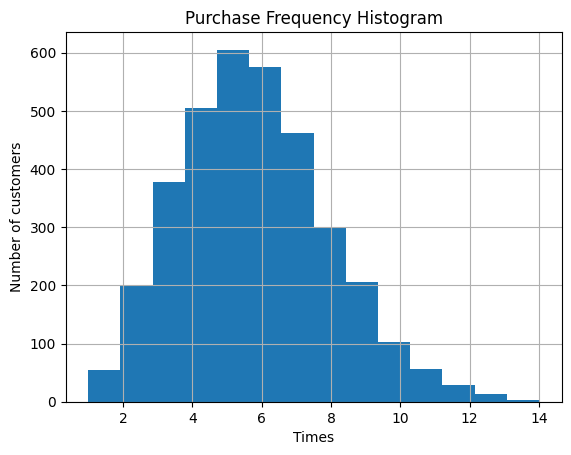

In [34]:
# visualize the distribution of purchase frequency
Merged_df['customer_id'].value_counts().hist(bins=14)
plt.title('Purchase Frequency Histogram')
plt.xlabel('Times')
plt.ylabel('Number of customers')

There are total 3493 customers. Three customers(IDs are 2476,1068,2183) purchase most, up to 14 times. Most of the customers have bought 5 times.Only a very small percentage of customers buy only once. Most of the customers are loyal customers.

online_order
True     10086
False     9687
Name: count, dtype: int64
order_status
Approved     19596
Cancelled      177
Name: count, dtype: int64


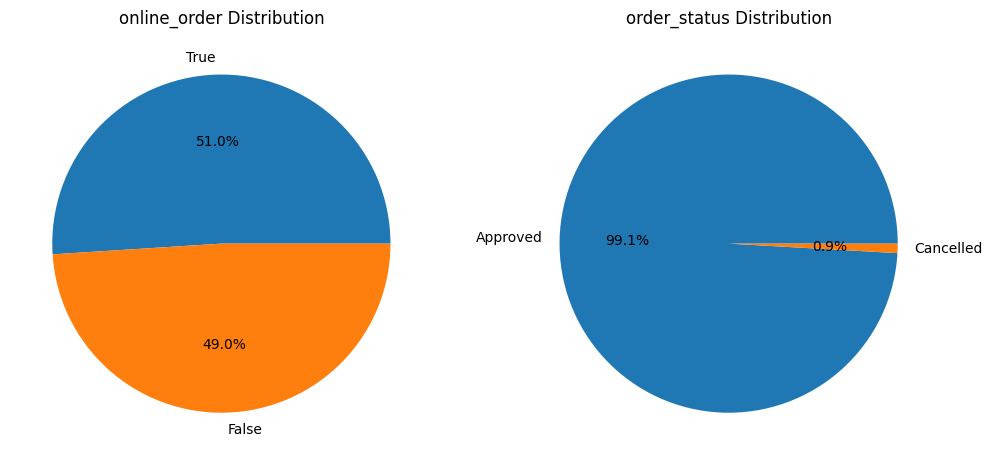

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 12))
# Call pie function for each variable and pass the appropriate axis
category_pie(Merged_df, 'online_order', ax=axes[0])  # First pie chart
category_pie(Merged_df, 'order_status', ax=axes[1])

Most of them are online orders and only 0.9% got cancelled

brand
Solex             4248
Giant Bicycles    3308
WeareA2B          3290
OHM Cycles        3039
Trek Bicycles     2983
Norco Bicycles    2905
Name: count, dtype: int64
product_line
Standard    14156
Road         3963
Touring      1234
Mountain      420
Name: count, dtype: int64
product_class
medium    13802
high       3012
low        2959
Name: count, dtype: int64
product_size
medium    12969
large      3970
small      2834
Name: count, dtype: int64


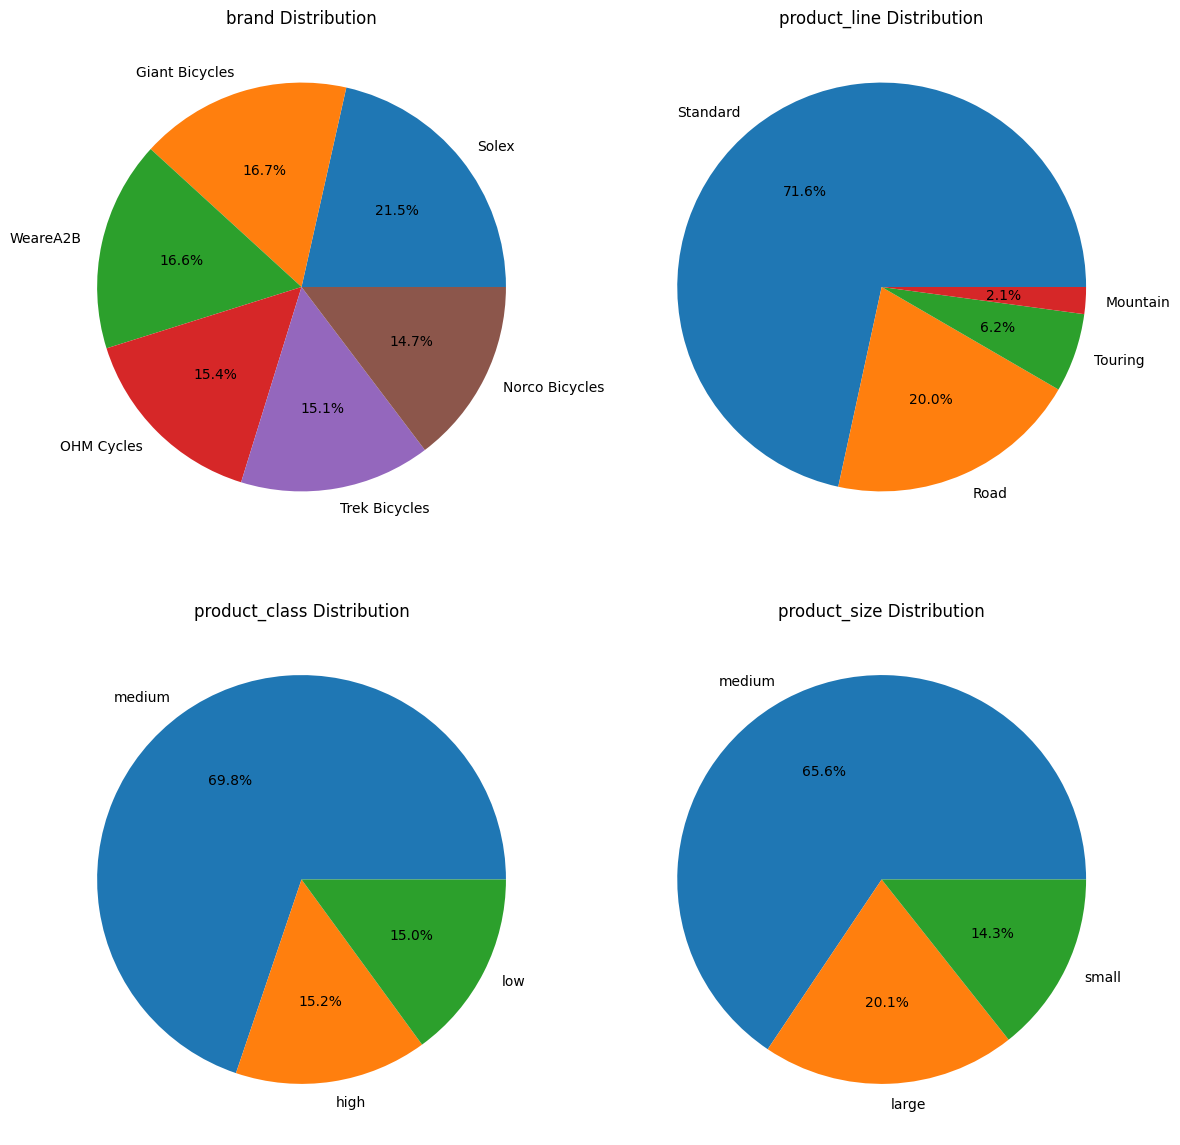

In [36]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Call  pie function for each variable and pass the appropriate axis
category_pie(Merged_df,'brand',ax=axes[0,0])
category_pie(Merged_df, 'product_line', ax=axes[0, 1]) 
category_pie(Merged_df, 'product_class', ax=axes[1, 0])  
category_pie(Merged_df, 'product_size', ax=axes[1, 1])   

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plots
plt.show()

* Not much difference between different brands, solex sold the best while Norco Bicycles sold the least
* The standard product line, the medium calss and the medium size product sold the best

age_category
Middle Age     8486
Adult          5234
Senior         3620
Young Adult    2433
Name: count, dtype: int64
gender
Female    10354
Male       9419
Name: count, dtype: int64
owns_car
Yes    9950
No     9823
Name: count, dtype: int64
wealth_segment
Mass Customer        9923
High Net Worth       5040
Affluent Customer    4810
Name: count, dtype: int64
job_industry_category
Manufacturing         7168
Financial Services    3836
Health                3073
Retail                1746
Property              1278
IT                    1060
Entertainment          694
Agriculture            566
Telecommunications     352
Name: count, dtype: int64
state
NSW    10563
VIC     4988
QLD     4222
Name: count, dtype: int64


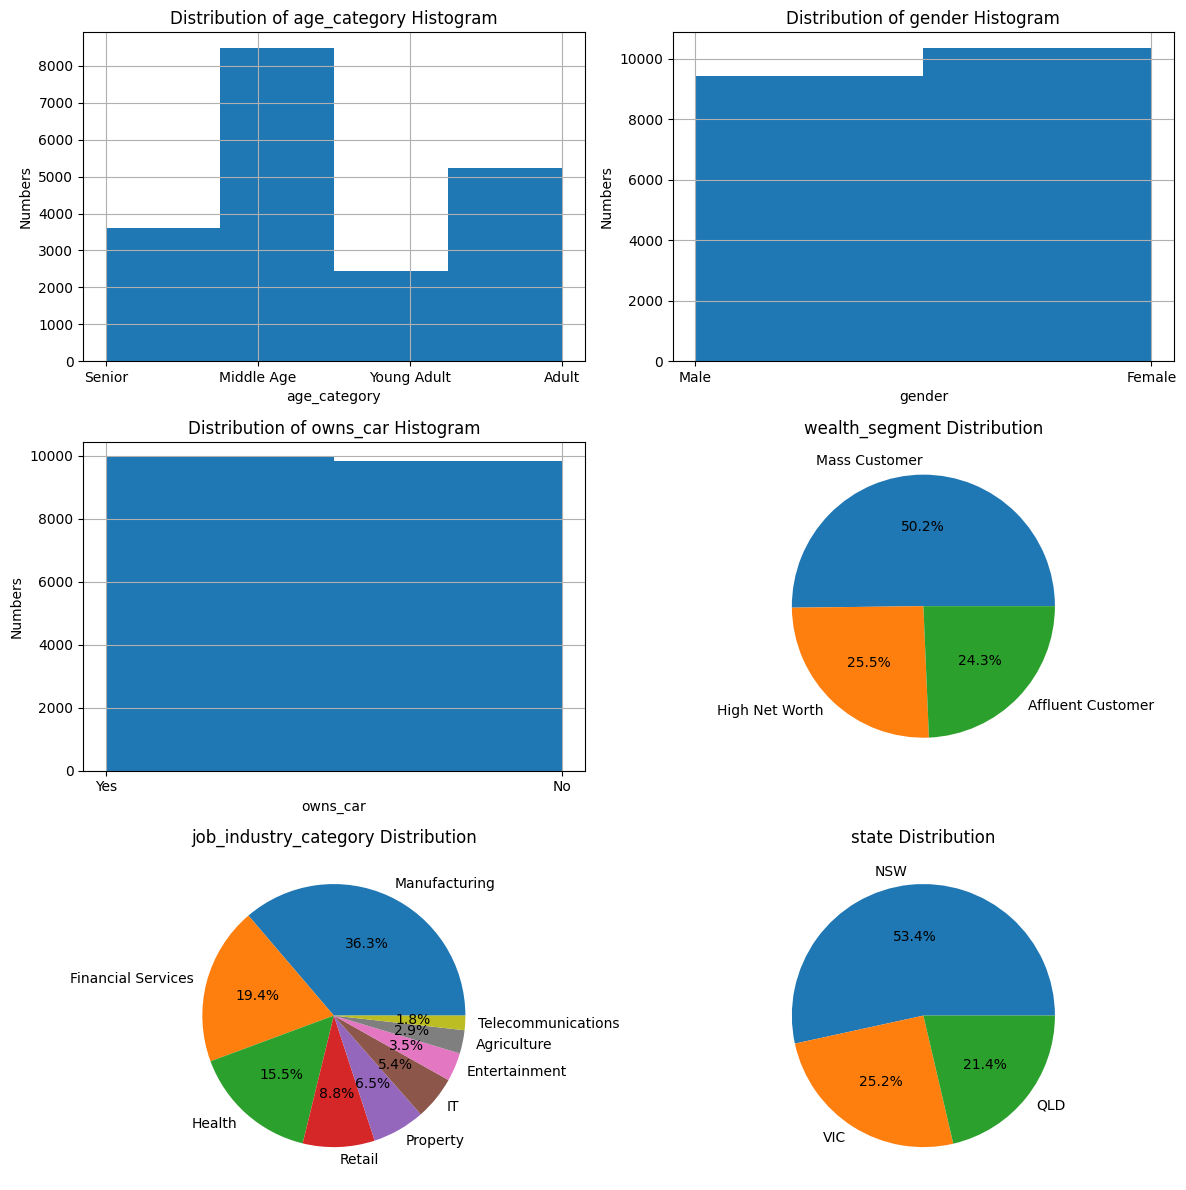

In [37]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(3, 2,figsize=(12,12))

# Call your pie function for each variable and pass the appropriate axis
category_bar(Merged_df, 'age_category', ax=axes[0, 0])  
category_bar(Merged_df, 'gender', ax=axes[0, 1])        
category_bar(Merged_df, 'owns_car', ax=axes[1, 0])        
category_pie(Merged_df, 'wealth_segment', ax=axes[1, 1]) 
category_pie(Merged_df, 'job_industry_category', ax=axes[2, 0]) 
category_pie(Merged_df,'state',ax=axes[2,1])



# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plots
plt.show()

Most customers are middle age,female,owns car, work in manufacturing, live in NSW and are mass customers.

**2.2.2 Numerical Variables**

In [38]:
def plot_distplot(data,variable,ax):
    sns.distplot(data[variable],ax=ax)
    ax.set_title(f'Distribution of {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Density')

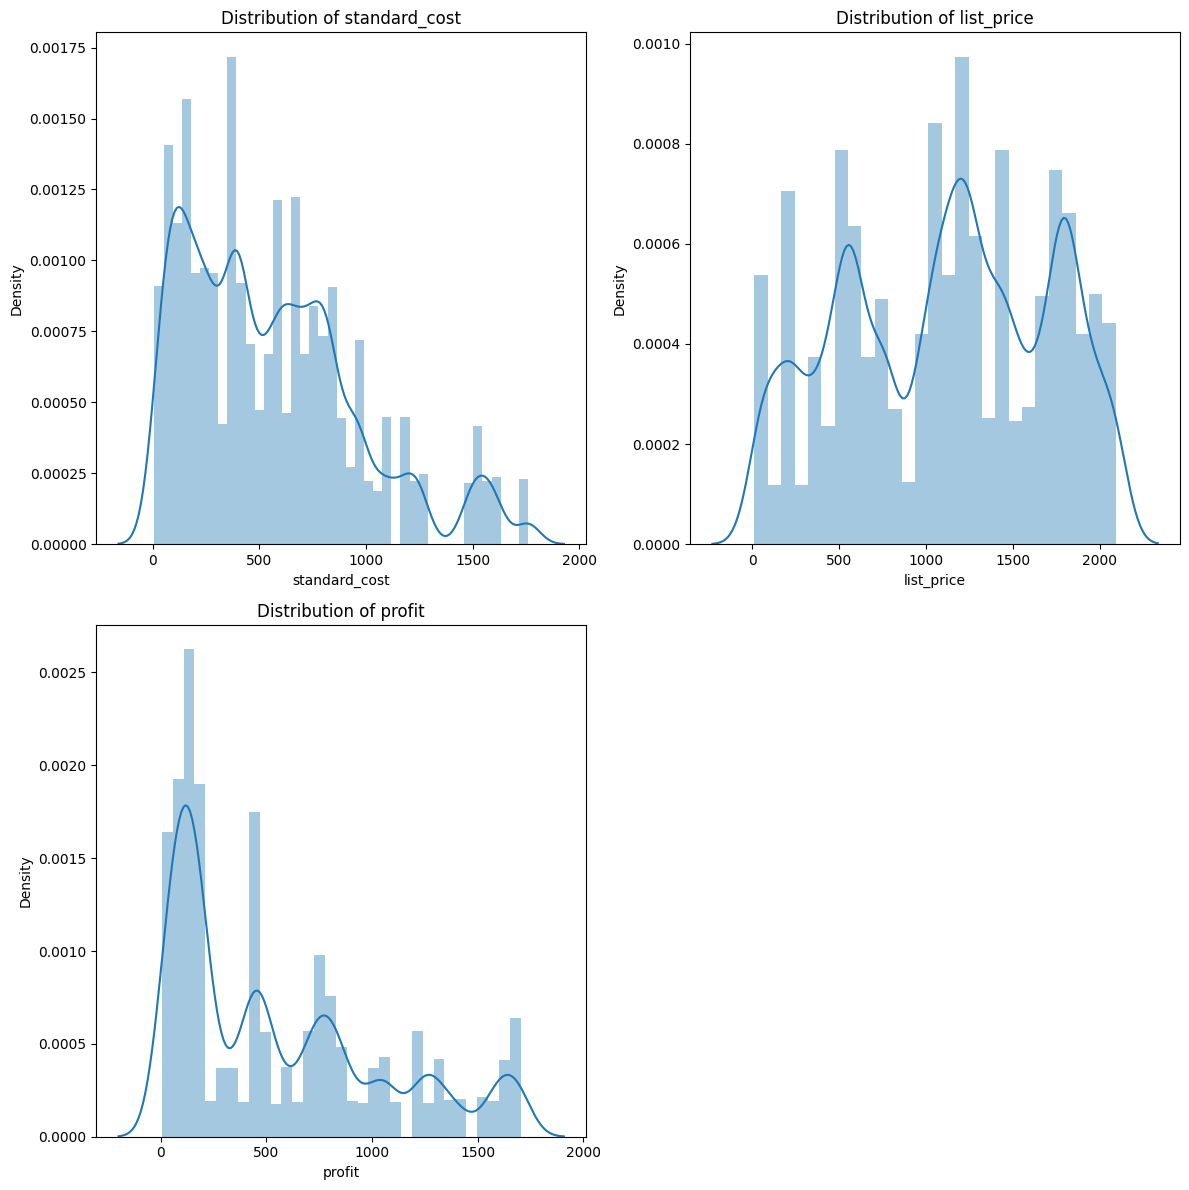

In [39]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Call your pie function for each variable and pass the appropriate axis
plot_distplot(Merged_df,'standard_cost',ax=axes[0, 0])
plot_distplot(Merged_df,'list_price',ax=axes[0,1])
plot_distplot(Merged_df,'profit',ax=axes[1,0])
# Hide the fourth empty subplot
axes[1, 1].axis('off')

# Adjust the layout to make sure everything fits
plt.tight_layout()

# Show the plots
plt.show()

**2.2.3 Profit Segmentation**

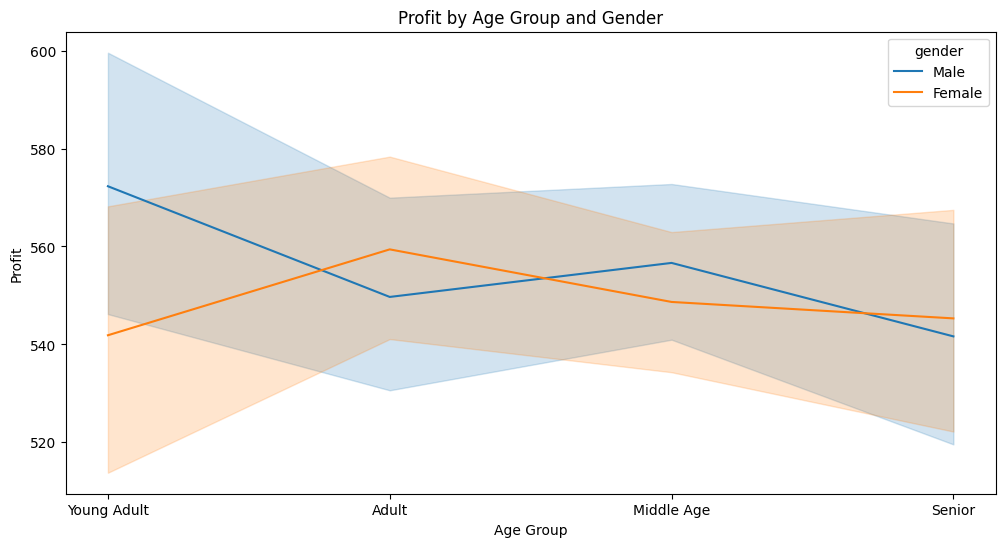

In [40]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='age_category', y='profit', hue='gender', data=Merged_df)
plt.title('Profit by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Profit')
plt.show()

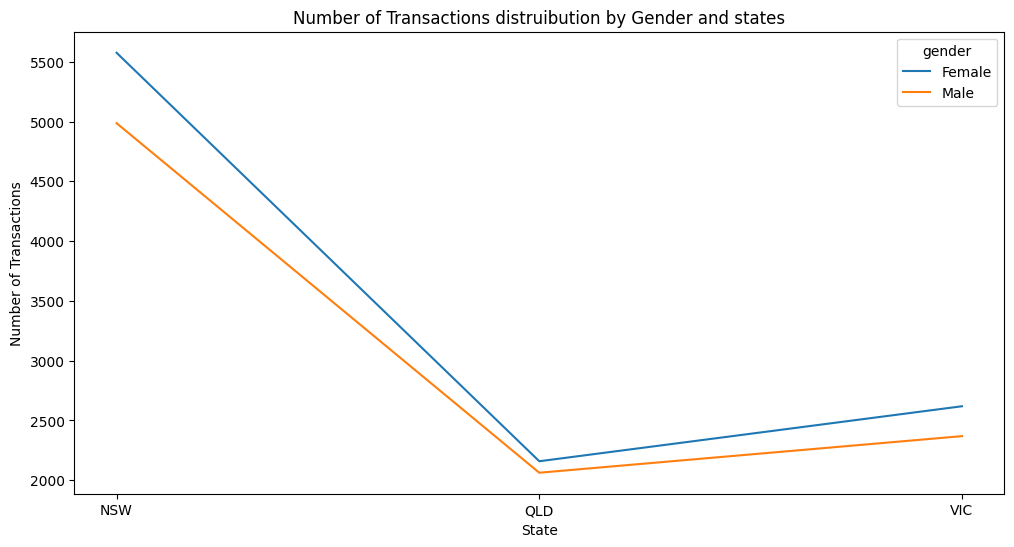

In [41]:
# Group by brand and state to count transactions
state_gender_counts = Merged_df.groupby(['state', 'gender']).size().reset_index(name='transaction_count')

# Plot the data using a bar plot with hue for state
plt.figure(figsize=(12, 6))
bar_plot=sns.lineplot(x='state', y='transaction_count', hue='gender', data=state_gender_counts)
plt.title('Number of Transactions distruibution by Gender and states')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.show()

In [42]:
def profit_segmentation_stack(data,category,sub_cat):
  # Aggregate data by job_industry_category
  aggregated_data = data.groupby([category,sub_cat])['profit'].sum().unstack().fillna(0)

  # Create the stacked bar plot
  aggregated_data.plot(kind='bar', stacked=True)

  plt.title(f'Sum of Profit by {category} and {sub_cat}')
  plt.xlabel(f'{category}')
  plt.ylabel('Sum of Profit')
  plt.xticks(rotation=45)
  plt.legend(title=sub_cat)
  plt.show()

In [43]:
def profit_segmentation_nonstack(data,category,sub_cat):
    # Aggregate data by category
    aggregated_data = data.groupby([category,sub_cat])['profit'].sum().unstack().fillna(0)
    bar_plot=sns.barplot(x=category, y='profit', hue=sub_cat, data=data, ci=None)
    for p in bar_plot.patches:
        bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
    plt.title(f'Sum of Profit by {category} and {sub_cat}')
    plt.xlabel(f'{category}')
    plt.ylabel('Sum of Profit')
    plt.xticks(rotation=45)
    plt.legend(title=sub_cat)
    plt.show()
        

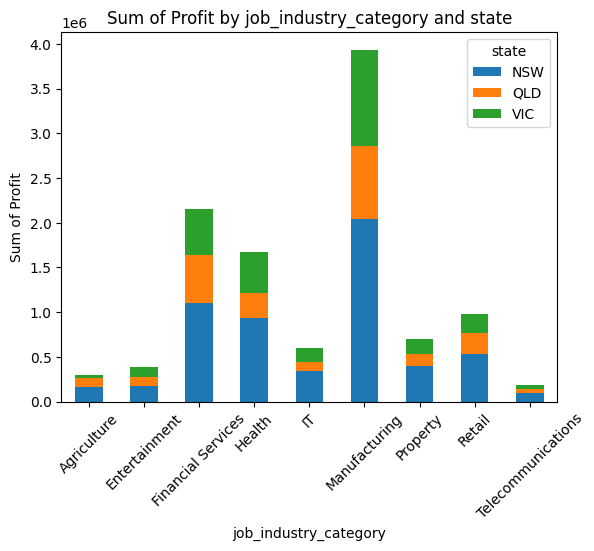

In [44]:
#profit distribution on job_industry_category
profit_segmentation_stack(Merged_df,'job_industry_category','state')

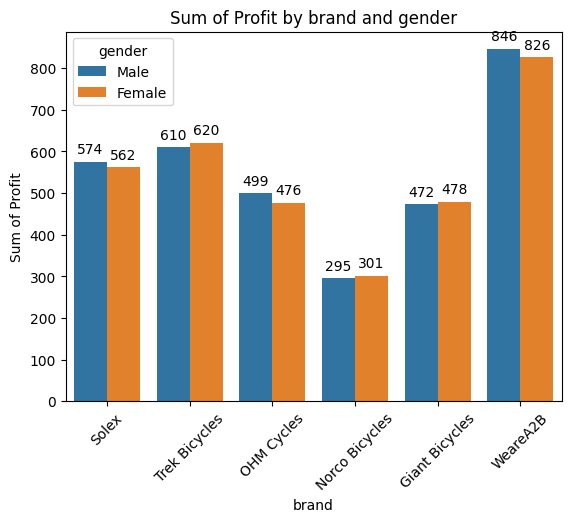

In [45]:
## Plot the data using a bar plot with hue for gender
profit_segmentation_nonstack(Merged_df,'brand','gender')

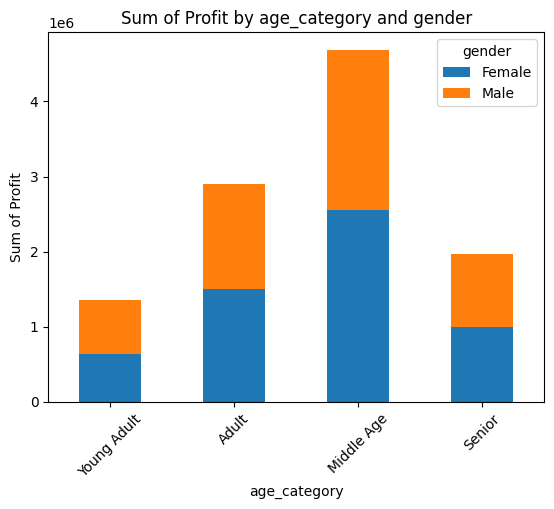

In [46]:
# profit distribution on age_category
profit_segmentation_stack(Merged_df,'age_category','gender')

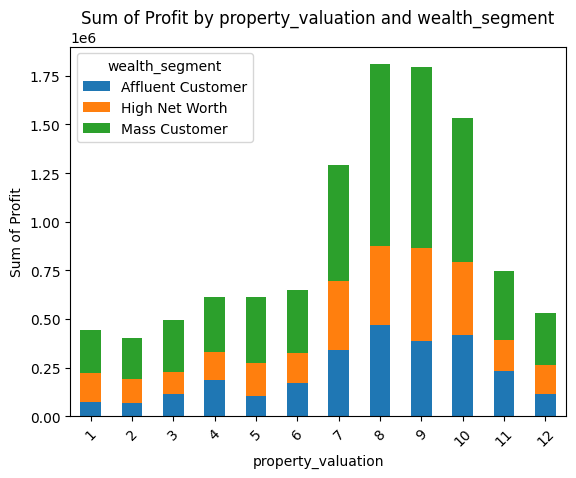

In [47]:
# profit distribution on property_valuation
profit_segmentation_stack(Merged_df,'property_valuation','wealth_segment')

Based on the graphs, I have the following observations:

Product Insights:

*   Solex had the highest sales, while Norco Bicycles had the lowest among the six brands. Both Solex and WeareA2B generated the highest profit, with Norco yielding the least.
*   The Standard product line was the top-seller, whereas the Mountain line had the lowest sales. In terms of profit, the Touring and Standard lines performed the best, while the Mountain line generated the least.
*   The Medium product class had the highest sales and profit, while the Low product class had the lowest in both categories.
*   Medium-sized products sold the most, but large-sized products brought in the highest profit.





Customer Insights:

*   Female customers slightly outnumber male customers.
*   The majority of customers fall within the 30-50 age group.
*   Most customers work in Manufacturing and belong to the "Mass" wealth segment.
*   The highest number of customers live in NSW.
*  Car ownership does not appear to significantly impact customer count.

# 3 Cohort Analysis

**3.1 Create Cohort Chart and Graph**

In [48]:
dt.datetime(Merged_df['transaction_date'][1].year, Merged_df['transaction_date'][1].month, 1)

datetime.datetime(2017, 5, 1, 0, 0)

In [49]:
def get_month(x):
  return dt.datetime(x.year,x.month,1)
Merged_df['TransactionMonth'] = pd.to_datetime(Merged_df['transaction_date']).apply(get_month)
Merged_df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,profit,age_category,TransactionMonth
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6,17.87,Senior,2017-02-01
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5,1702.55,Middle Age,2017-05-01
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,...,No,22.0,586 Miller Parkway,2835,NSW,Australia,1,1544.61,Middle Age,2017-10-01
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,...,No,16.0,1617 Harper Parkway,2096,NSW,Australia,10,817.36,Senior,2017-08-01
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,...,Yes,2.0,0601 Stephen Place,2292,NSW,Australia,7,1055.82,Young Adult,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19768,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,...,Yes,7.0,3 Hayes Court,3109,VIC,Australia,10,802.26,Young Adult,2017-06-01
19769,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,...,No,19.0,0 Pearson Crossing,4405,QLD,Australia,1,104.24,Middle Age,2017-11-01
19770,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,...,No,14.0,10055 Old Shore Lane,3630,VIC,Australia,1,1592.19,Middle Age,2017-04-01
19771,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,...,Yes,20.0,1 Wayridge Park,4301,QLD,Australia,1,91.15,Senior,2017-07-01


In [50]:
#Find earliest transaction date for each customer id ，only keep the different customer_id
Merged_df.groupby('customer_id')['TransactionMonth'].min()

customer_id
1      2017-01-01
2      2017-05-01
4      2017-04-01
5      2017-03-01
6      2017-01-01
          ...    
3496   2017-03-01
3497   2017-09-01
3498   2017-02-01
3499   2017-01-01
3500   2017-01-01
Name: TransactionMonth, Length: 3489, dtype: datetime64[ns]

In [51]:
#keep the same size of dataframe
Merged_df.groupby('customer_id')['TransactionMonth'].transform('min')

0       2017-02-01
1       2017-01-01
2       2017-01-01
3       2017-02-01
4       2017-01-01
           ...    
19768   2017-01-01
19769   2017-01-01
19770   2017-04-01
19771   2017-02-01
19772   2017-03-01
Name: TransactionMonth, Length: 19773, dtype: datetime64[ns]

In [52]:
# Grouping by customer_id and select the InvoiceMonth value
# Assigning a minimum InvoiceMonth value to the dataset
Merged_df['CohortMonth'] = Merged_df.groupby('customer_id')['TransactionMonth'].transform('min')
# printing top 5 rows
print(Merged_df.head())

  transaction_id product_id customer_id     transaction_date  online_order  \
0              1          2        2950  2017-02-25 00:00:00         False   
1              2          3        3120  2017-05-21 00:00:00          True   
2              3         37         402  2017-10-16 00:00:00         False   
3              4         88        3135  2017-08-31 00:00:00         False   
4              5         78         787  2017-10-01 00:00:00          True   

  order_status           brand product_line product_class product_size  ...  \
0     Approved           Solex     Standard        medium       medium  ...   
1     Approved   Trek Bicycles     Standard        medium        large  ...   
2     Approved      OHM Cycles     Standard           low       medium  ...   
3     Approved  Norco Bicycles     Standard        medium       medium  ...   
4     Approved  Giant Bicycles     Standard        medium        large  ...   

  tenure              address postcode state    country 

In [53]:
#First, we will create 6 variables that capture the integer value of years, months, and days for Transaction and Cohort Date using the get_date_int() function.
def get_date_int(df,column):
  year =  df[column].dt.year
  month = df[column].dt.month
  day = df[column].dt.day
  return year,month,day
#Getting the integers for date parts from the `InvoiceDay` column
transaction_year, transaction_month, _ = get_date_int(Merged_df, 'TransactionMonth')
# Getting the integers for date parts from the `CohortDay` column
cohort_year, cohort_month, _ = get_date_int(Merged_df, 'CohortMonth')

In [54]:
#Now we will calculate the difference between the Invoice Dates and Cohort dates in years, months separately. then calculate the total Months difference between the two. This will be our month’s offset or cohort Index, which we will use in the next section to calculate the retention rate.
years_diff = transaction_year - cohort_year;
months_diff = transaction_month - cohort_month;
Merged_df['CohortIndex'] = years_diff * 12 + months_diff + 1
Merged_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,address,postcode,state,country,property_valuation,profit,age_category,TransactionMonth,CohortMonth,CohortIndex
0,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,...,984 Hoepker Court,3064,VIC,Australia,6,17.87,Senior,2017-02-01,2017-02-01,1
1,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,...,4 Shopko Circle,2196,NSW,Australia,5,1702.55,Middle Age,2017-05-01,2017-01-01,5
2,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,...,586 Miller Parkway,2835,NSW,Australia,1,1544.61,Middle Age,2017-10-01,2017-01-01,10
3,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,...,1617 Harper Parkway,2096,NSW,Australia,10,817.36,Senior,2017-08-01,2017-02-01,7
4,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,...,0601 Stephen Place,2292,NSW,Australia,7,1055.82,Young Adult,2017-10-01,2017-01-01,10


In [55]:
# Counting daily active user from each chort
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = Merged_df.groupby(['CohortMonth', 'CohortIndex']).nunique()['customer_id'].reset_index()
# Printing top 5 rows of Dataframe
cohort_data

,CohortMonth,CohortIndex,customer_id
0,2017-01-01,1,1339
1,2017-01-01,2,481
2,2017-01-01,3,495
3,2017-01-01,4,496
4,2017-01-01,5,489
...,...,...,...
73,2017-10-01,2,6
74,2017-10-01,3,9
75,2017-11-01,1,13
76,2017-11-01,2,5


**3.2 Calculate business metrics: retention rate**

In [56]:
cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1339.0,481.0,495.0,496.0,489.0,476.0,505.0,521.0,490.0,517.0,491.0,506.0
2017-02-01,801.0,320.0,296.0,314.0,286.0,298.0,308.0,280.0,329.0,302.0,294.0,NaN
2017-03-01,482.0,167.0,171.0,164.0,182.0,179.0,168.0,207.0,189.0,183.0,NaN,NaN
2017-04-01,342.0,113.0,122.0,157.0,146.0,122.0,143.0,127.0,133.0,NaN,NaN,NaN
2017-05-01,211.0,85.0,79.0,86.0,73.0,73.0,74.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,123.0,44.0,45.0,49.0,47.0,45.0,52.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,78.0,27.0,28.0,33.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,18.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
cohort_counts = cohort_data.pivot(index='CohortMonth',  columns ='CohortIndex', values = 'customer_id')
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention=retention.round(3)*100
retention

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.0,37.0,36.5,35.5,37.7,38.9,36.6,38.6,36.7,37.8
2017-02-01,100.0,40.0,37.0,39.2,35.7,37.2,38.5,35.0,41.1,37.7,36.7,NaN
2017-03-01,100.0,34.6,35.5,34.0,37.8,37.1,34.9,42.9,39.2,38.0,NaN,NaN
2017-04-01,100.0,33.0,35.7,45.9,42.7,35.7,41.8,37.1,38.9,NaN,NaN,NaN
2017-05-01,100.0,40.3,37.4,40.8,34.6,34.6,35.1,38.4,NaN,NaN,NaN,NaN
2017-06-01,100.0,35.8,36.6,39.8,38.2,36.6,42.3,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,34.6,35.9,42.3,47.4,30.8,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,35.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**3.3 Visualize the retention rate**

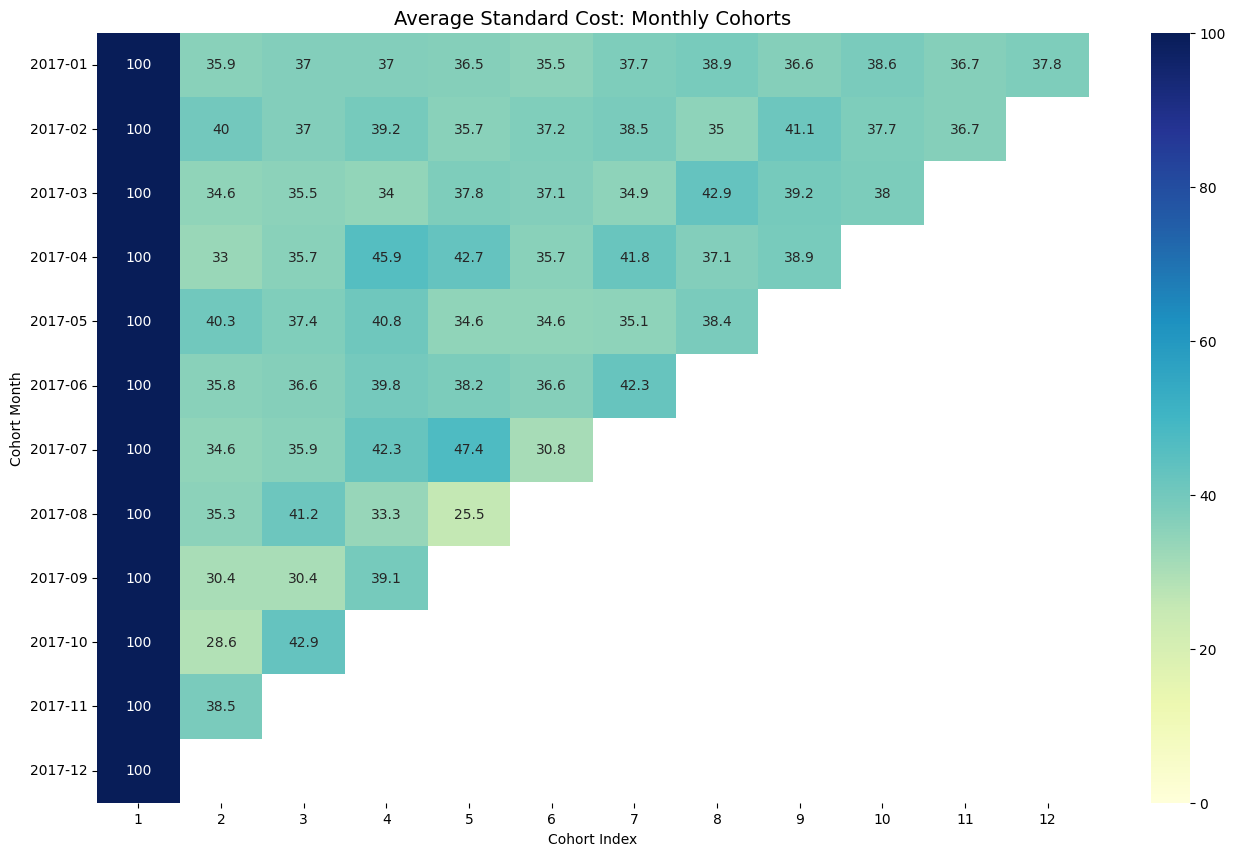

In [58]:
retention.index = retention.index.to_series().dt.strftime('%Y-%m')
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention, annot = True,vmin = 0.0, vmax =100,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks(rotation=360)
plt.show()

Notice that from corhort index 5, month 07, to index 6, there's a big decrease in customer engagement. Run customer segmentatino on both of these two months

In [59]:
#find these two groups to analyze the problm
df_48 = Merged_df[(Merged_df['CohortMonth']== '2017-07-01') & (Merged_df['CohortIndex']==5)]
df_31 = Merged_df[(Merged_df['CohortMonth']== '2017-07-01') & (Merged_df['CohortIndex']==6)]

By gender

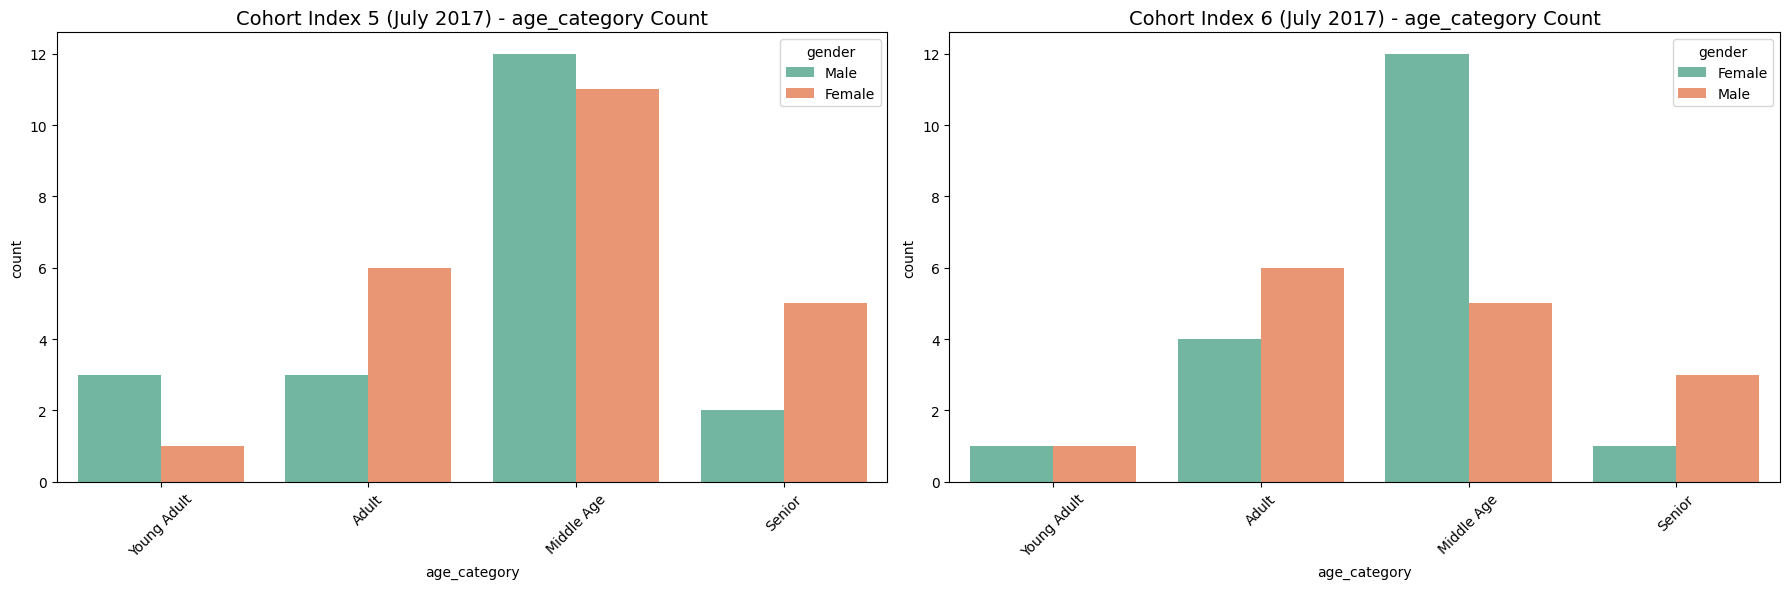

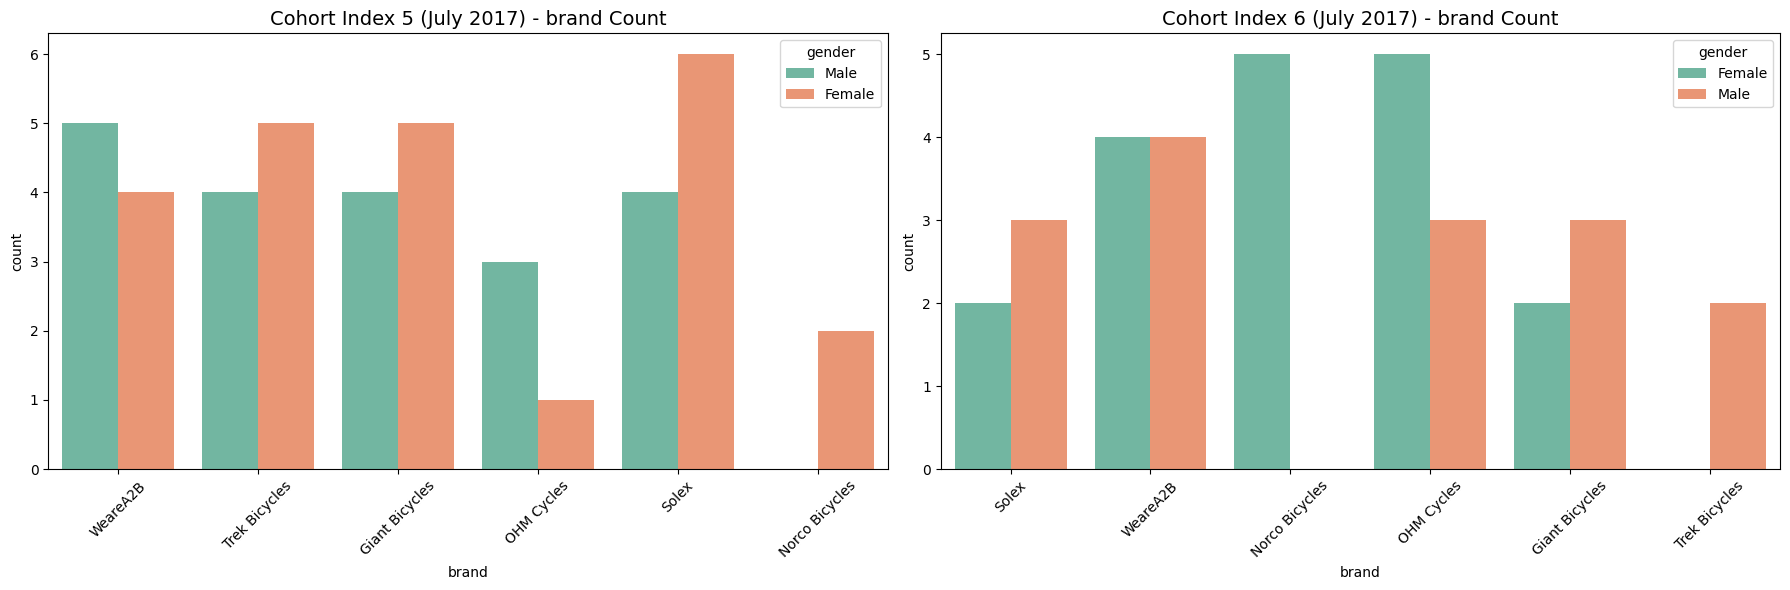

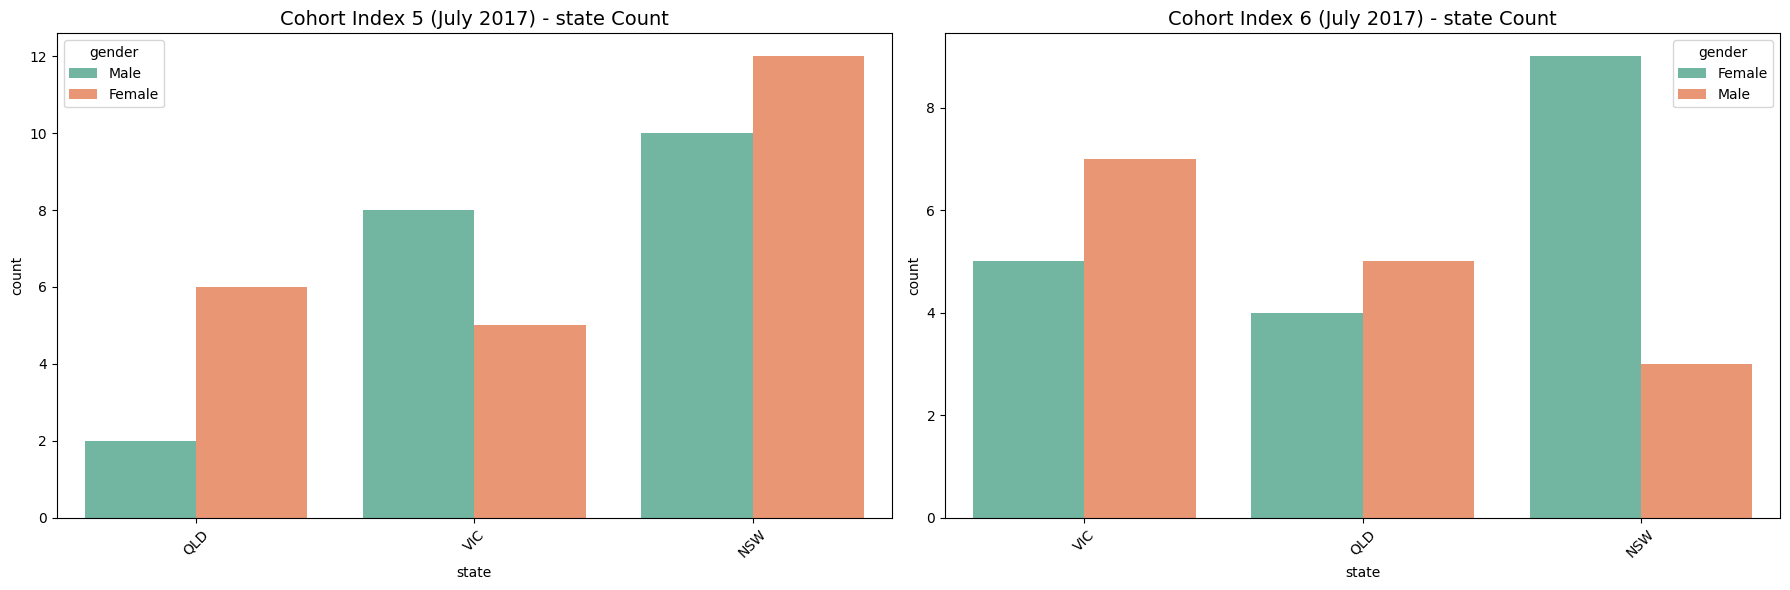

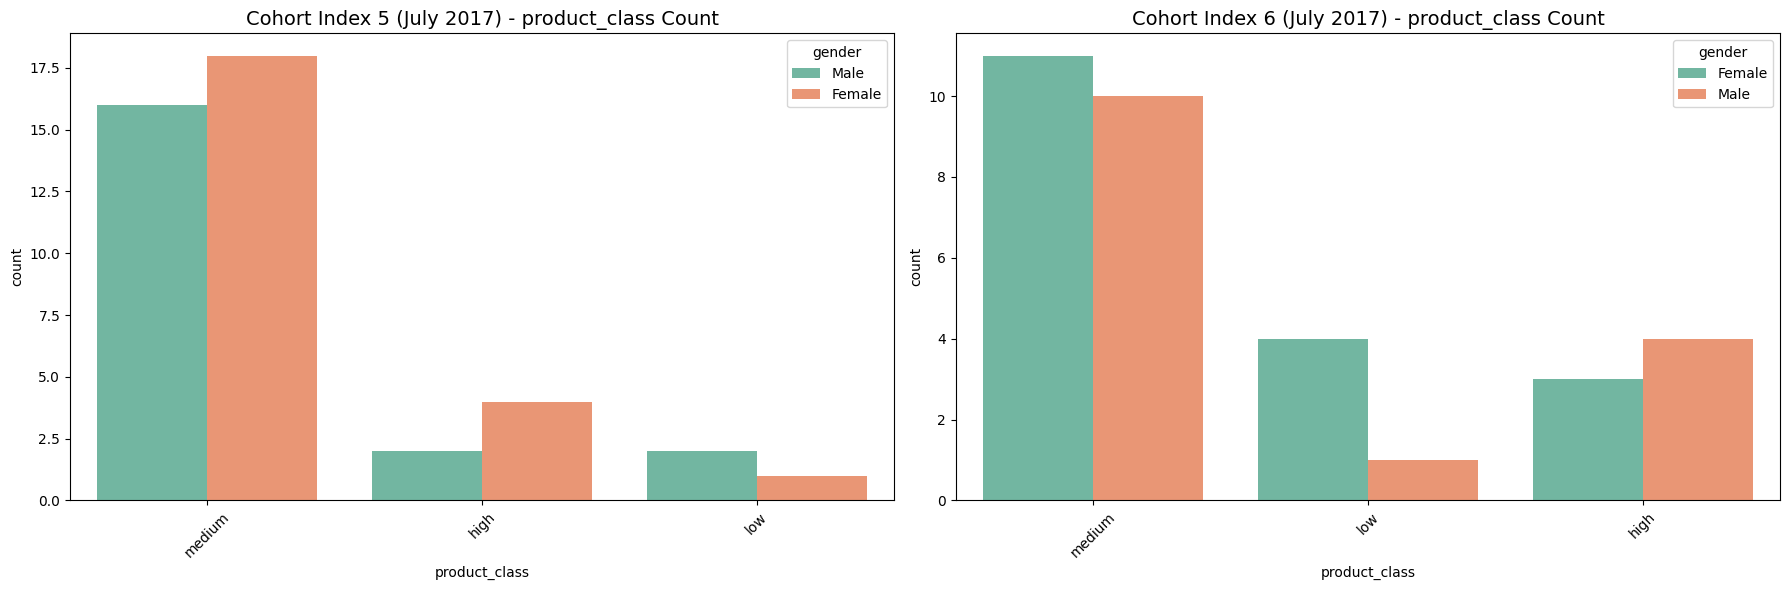

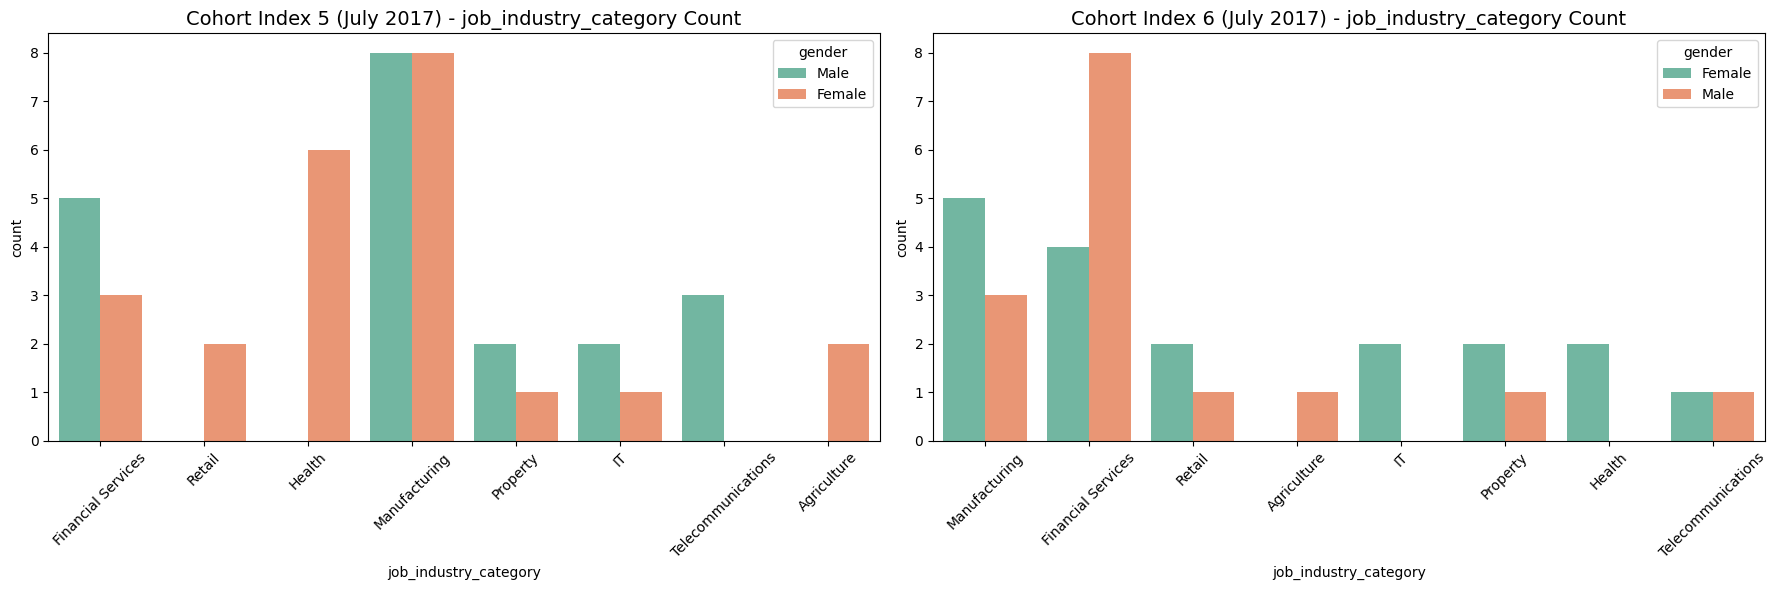

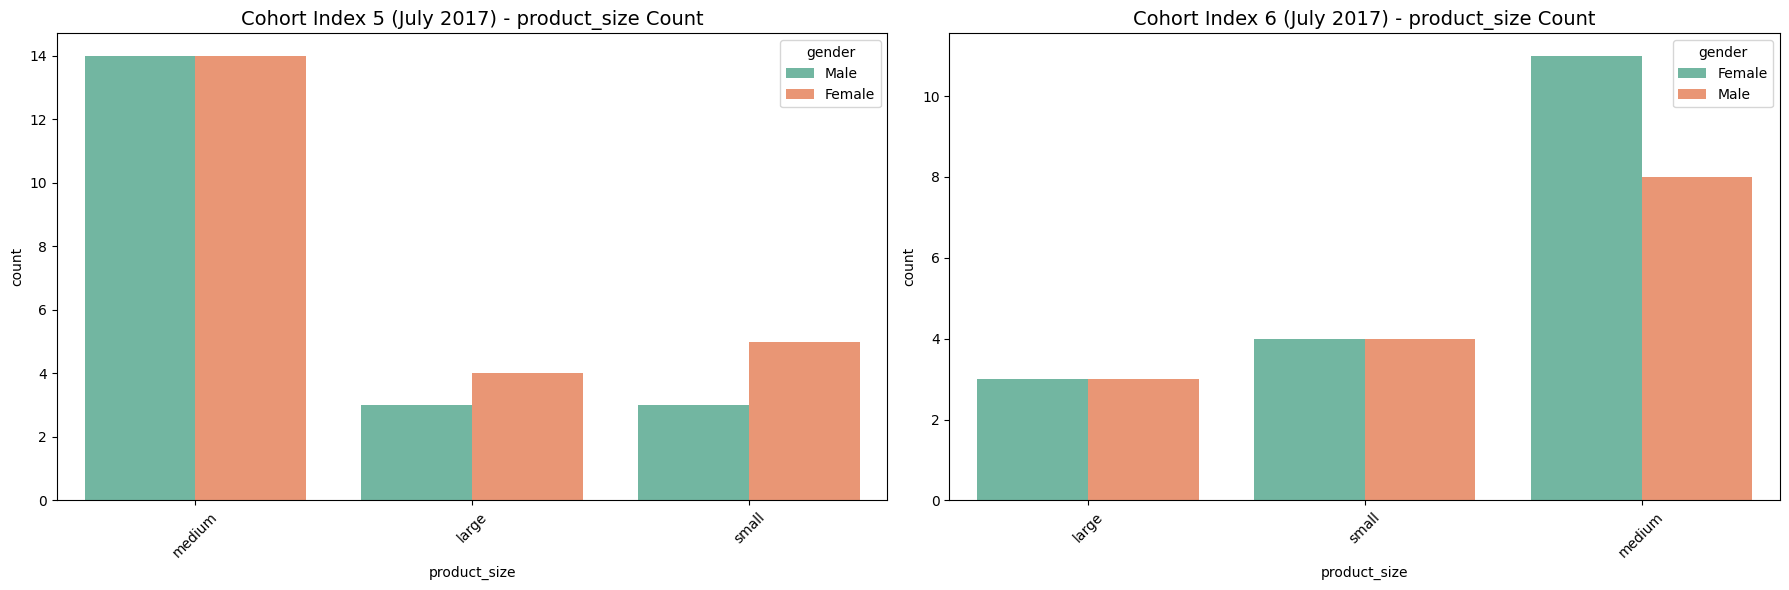

In [60]:
# plot count differences between df_48 and df_31
def plot_count_comparison(df1, df2, title1, title2, column_name,subcat):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # df1 Countplot
    sns.countplot(data=df1, x=column_name, palette='Set2',hue=subcat,ax=axes[0])
    axes[0].set_title(f'{title1} - {column_name} Count', fontsize=14)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    # df2 Countplot
    sns.countplot(data=df2, x=column_name, palette='Set2',hue=subcat, ax=axes[1])
    axes[1].set_title(f'{title2} - {column_name} Count', fontsize=14)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


# Apply the count comparison for each specified column
for column in ['age_category', 'brand', 'state', 'product_class', 'job_industry_category', 'product_size']:
    plot_count_comparison(df_48, df_31, title1="Cohort Index 5 (July 2017)", title2="Cohort Index 6 (July 2017)", column_name=column,subcat='gender')

By geographically

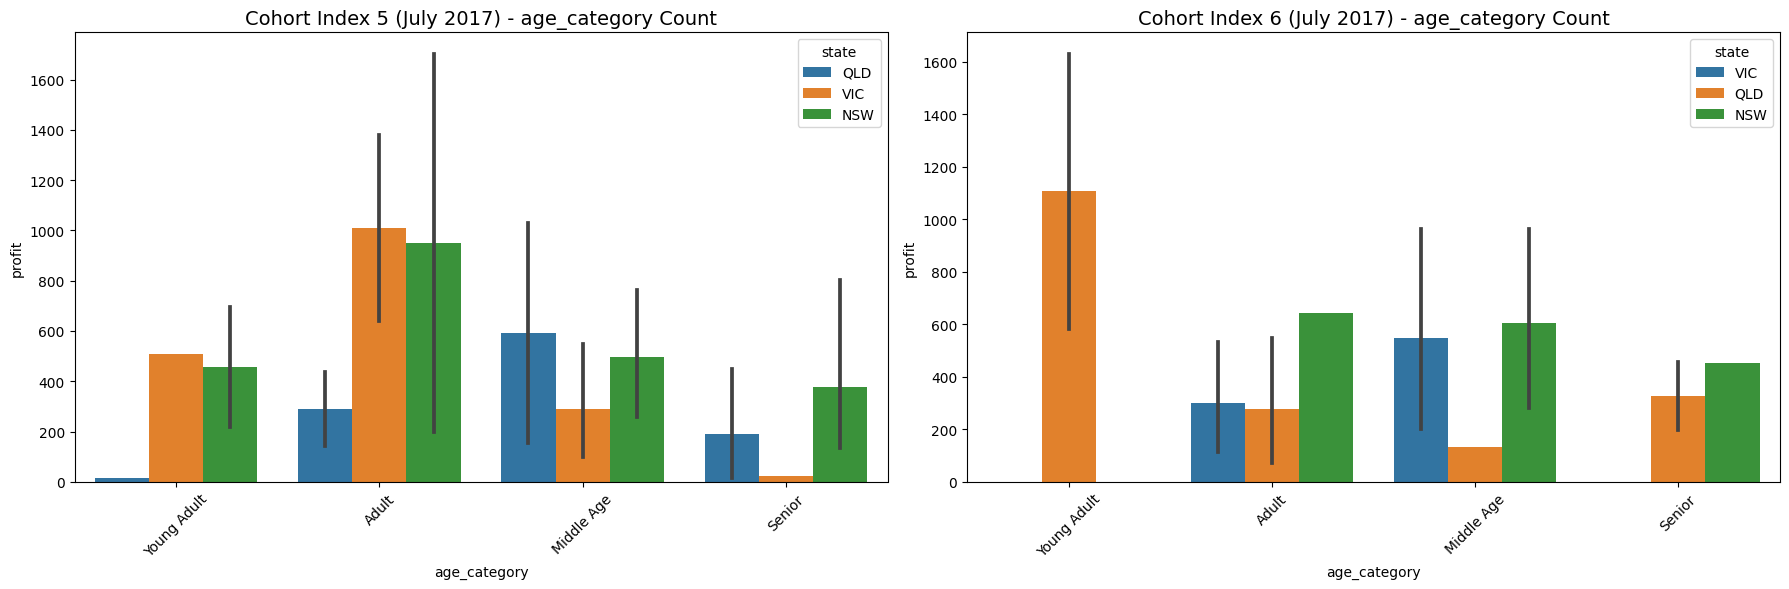

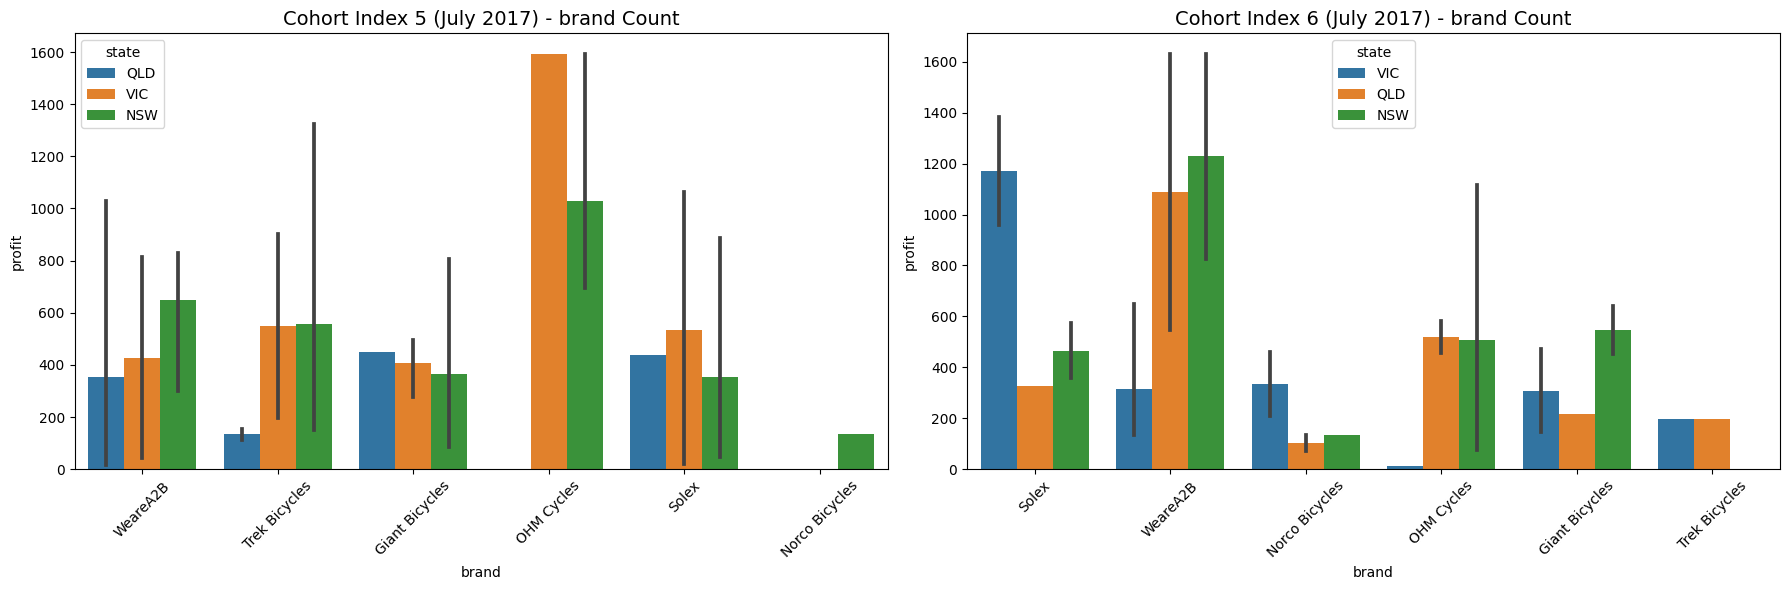

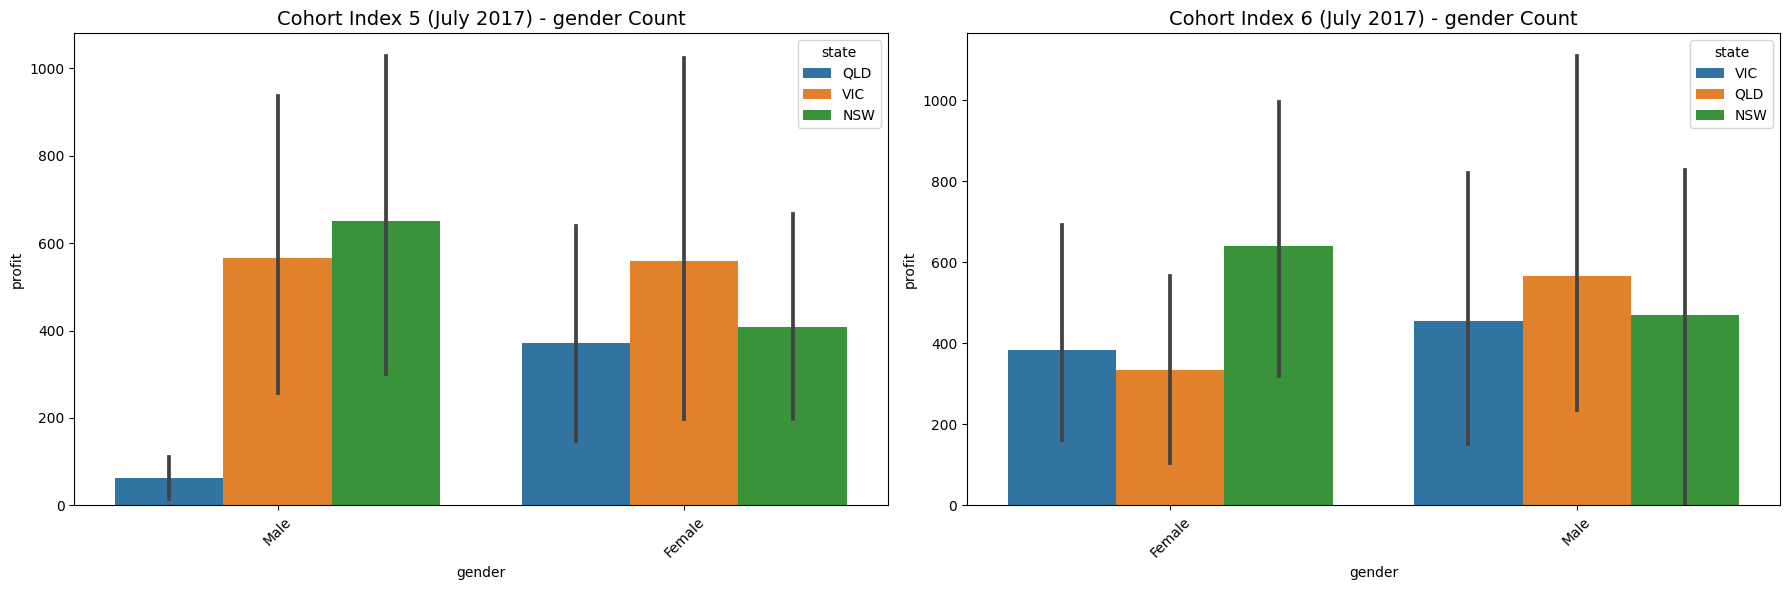

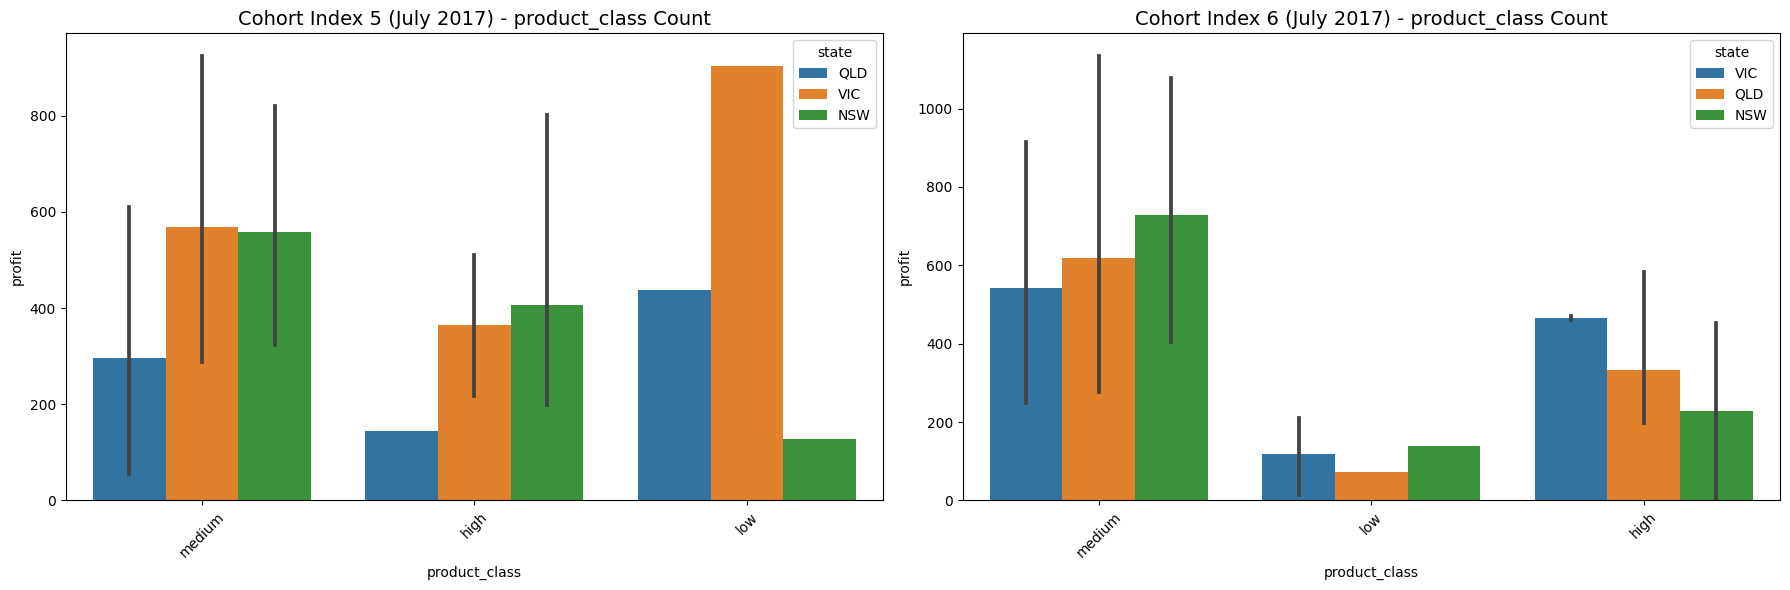

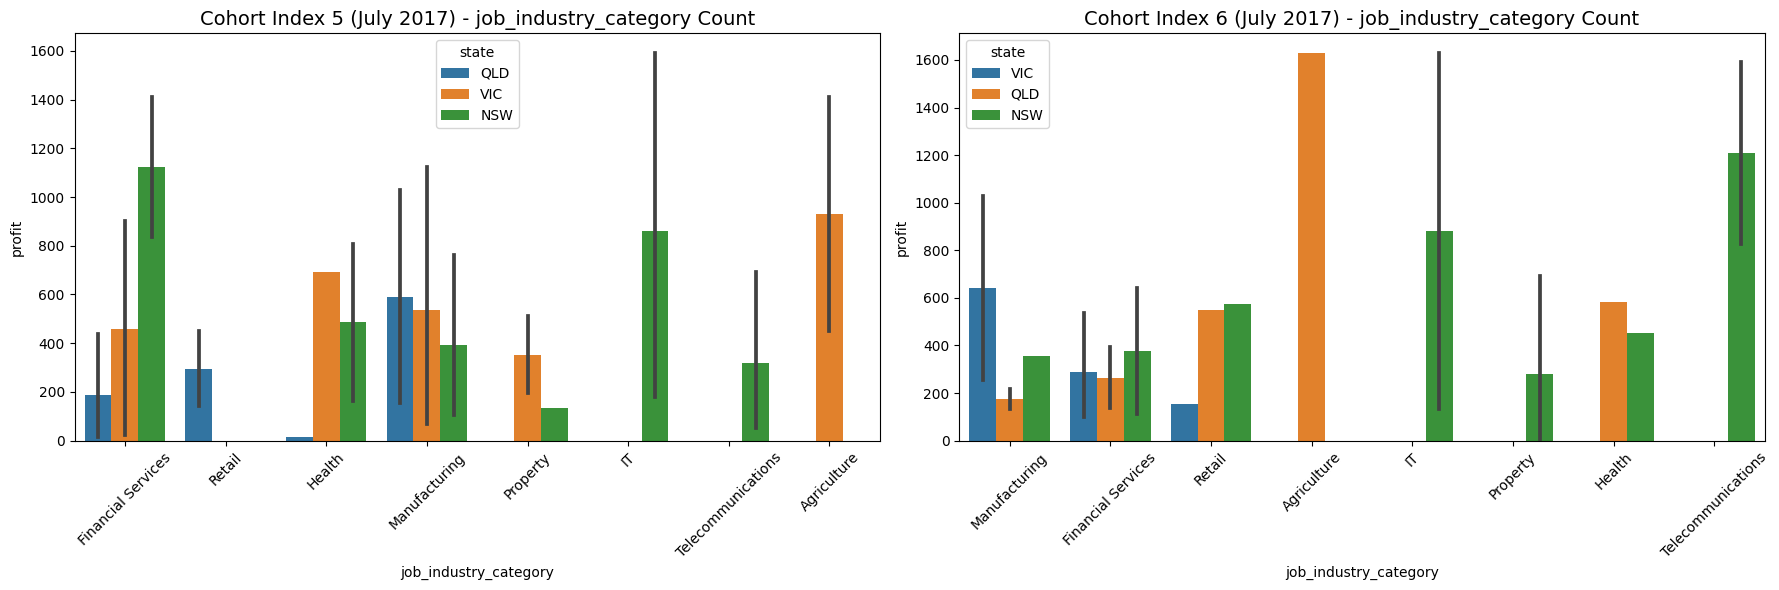

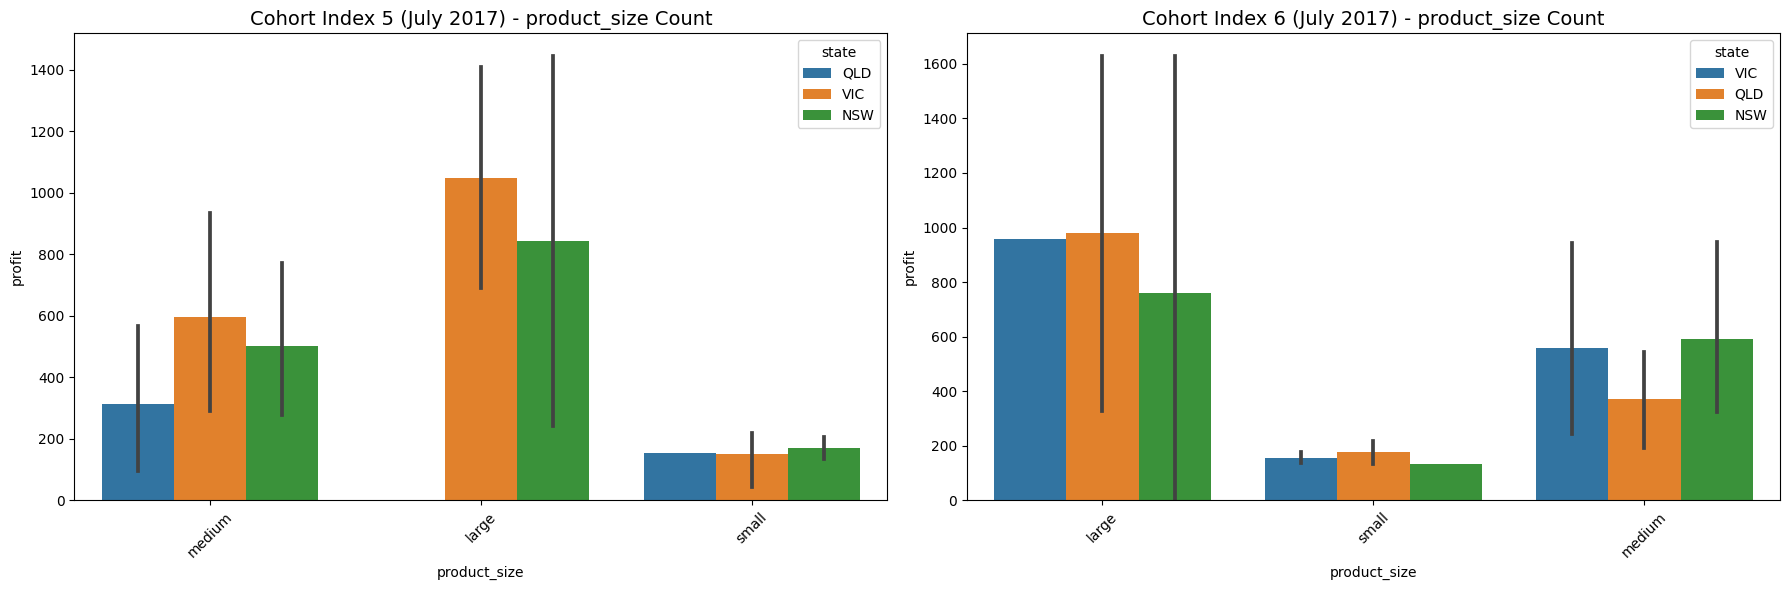

In [61]:
# plot count differences between df_48 and df_31
def plot_profit_comparison_state(df1, df2, title1, title2, column_name,subcat):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # df1 Countplot
    sns.barplot(data=df1, x=column_name, y='profit', hue=subcat, ax=axes[0])
    axes[0].set_title(f'{title1} - {column_name} Count', fontsize=14)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    # df2 Countplot
    sns.barplot(data=df2, x=column_name, y='profit', hue=subcat, ax=axes[1])
    axes[1].set_title(f'{title2} - {column_name} Count', fontsize=14)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


# Apply the count comparison for each specified column
for column in ['age_category', 'brand','gender','product_class', 'job_industry_category', 'product_size']:
    plot_profit_comparison_state(df_48, df_31, title1="Cohort Index 5 (July 2017)", title2="Cohort Index 6 (July 2017)", column_name=column,subcat='state')

By age group

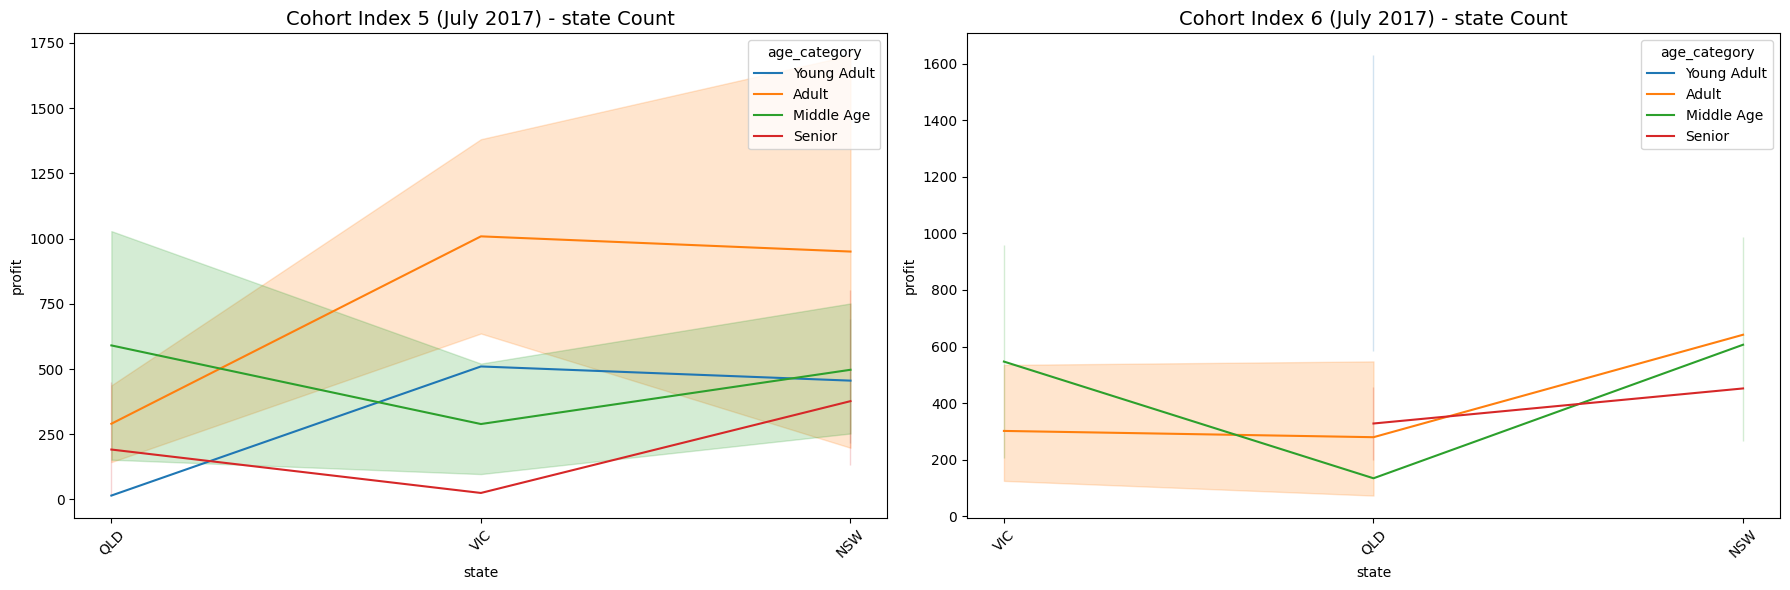

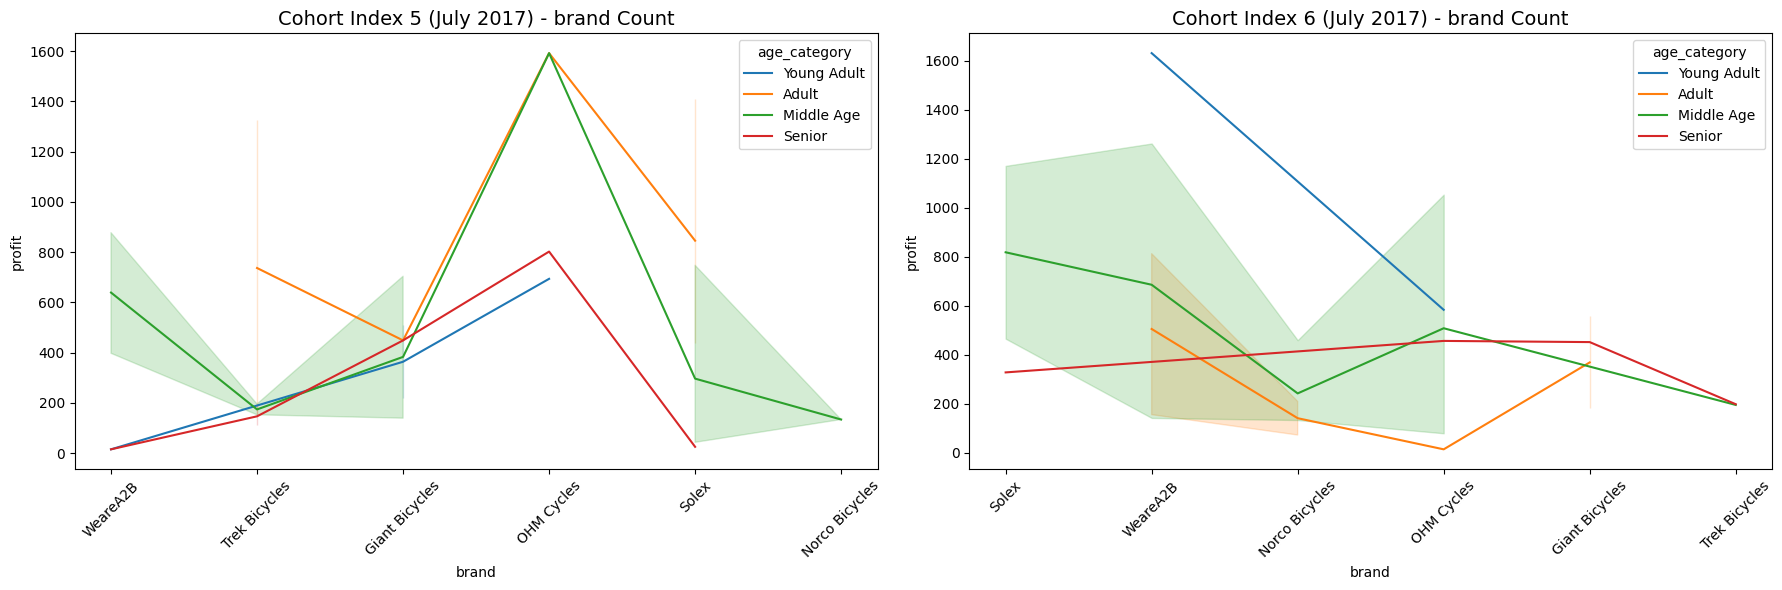

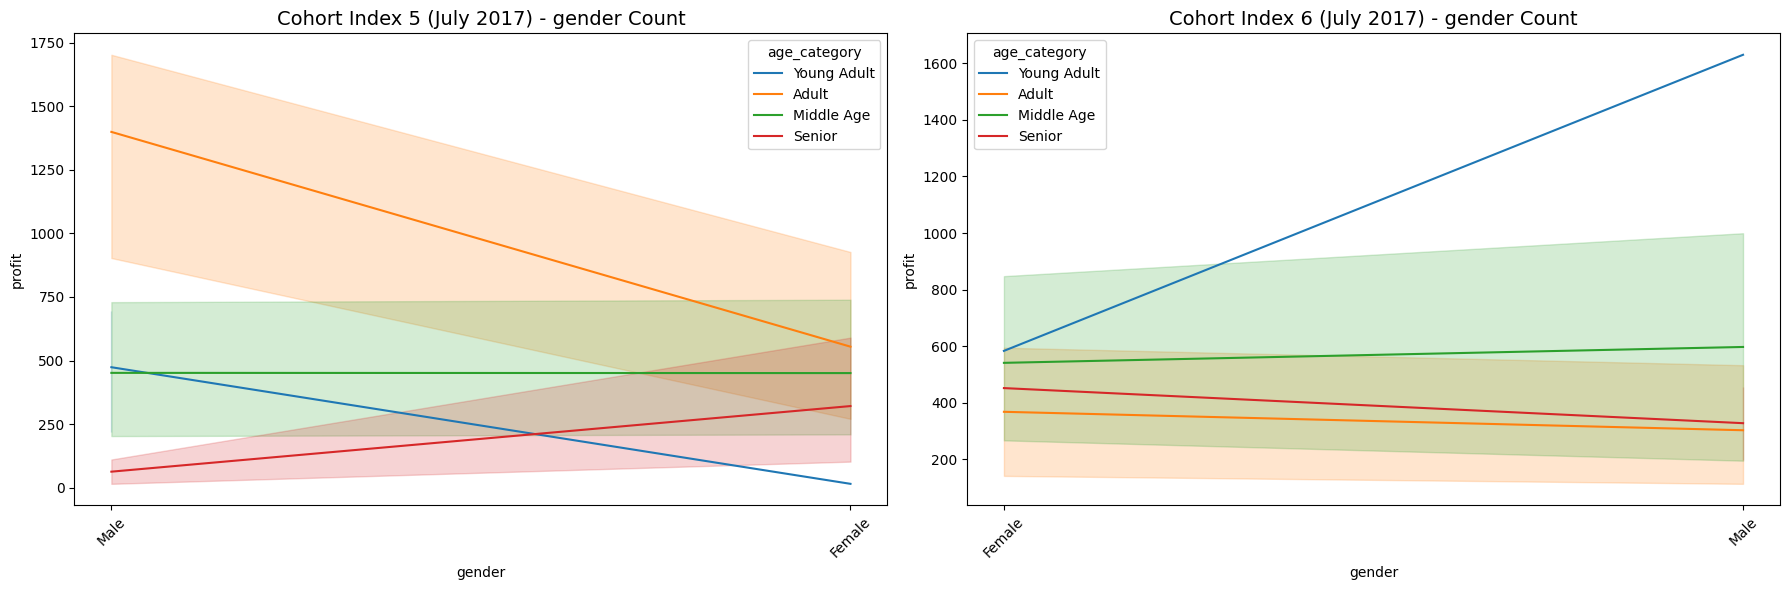

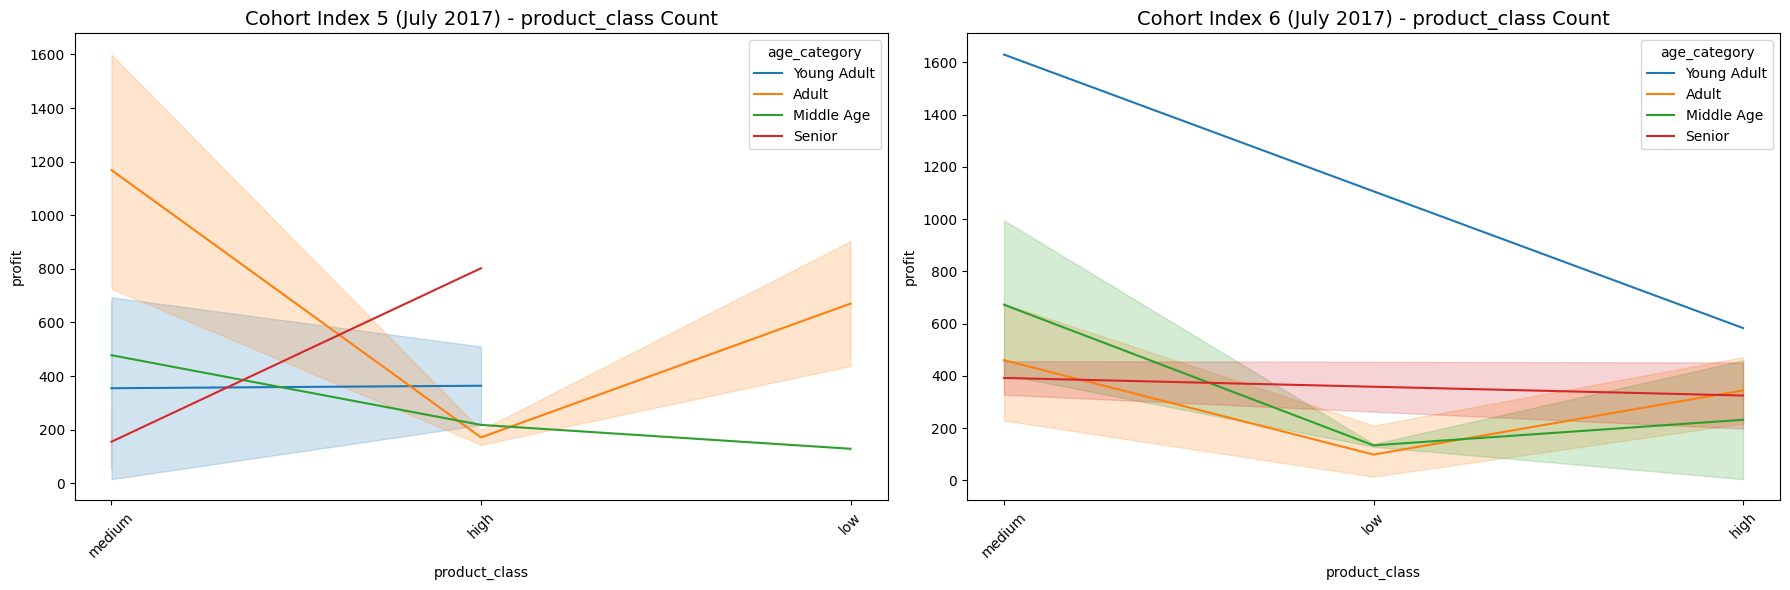

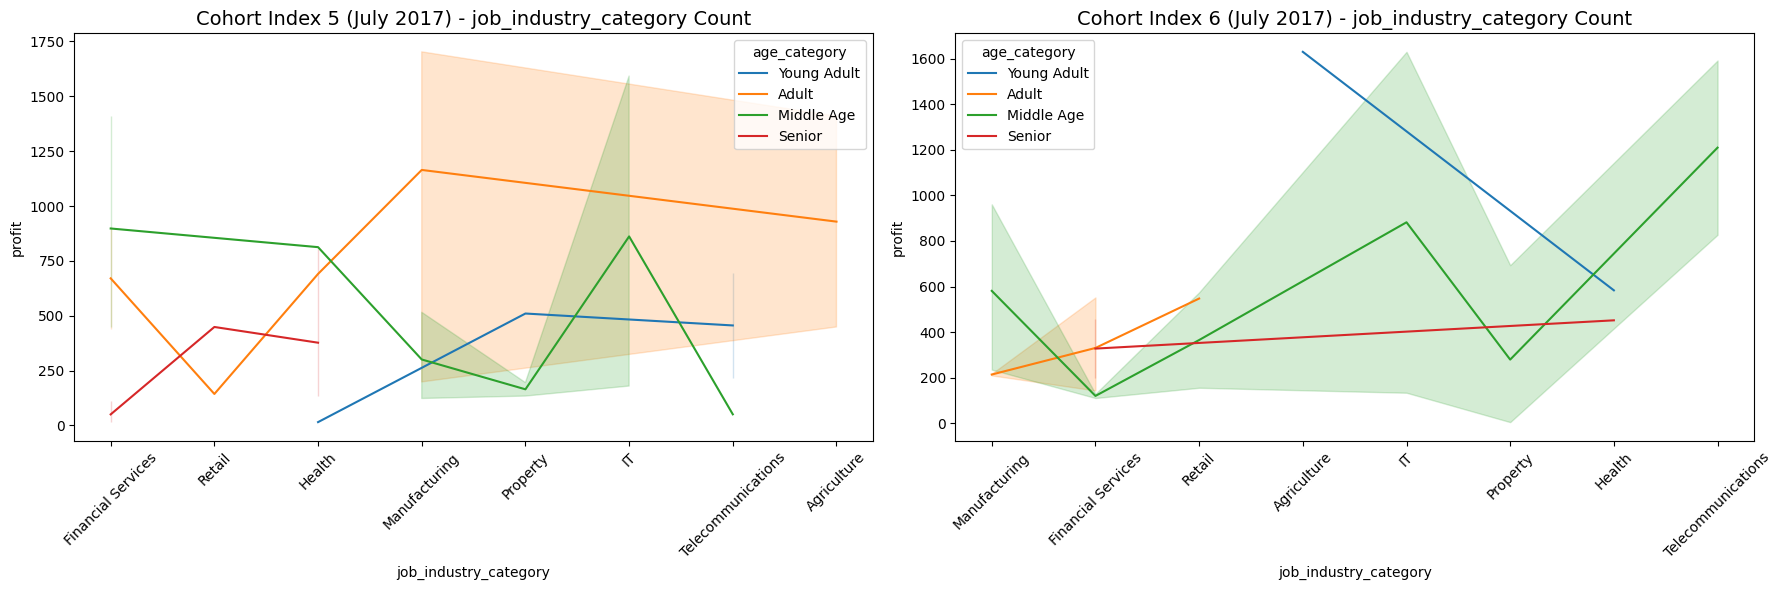

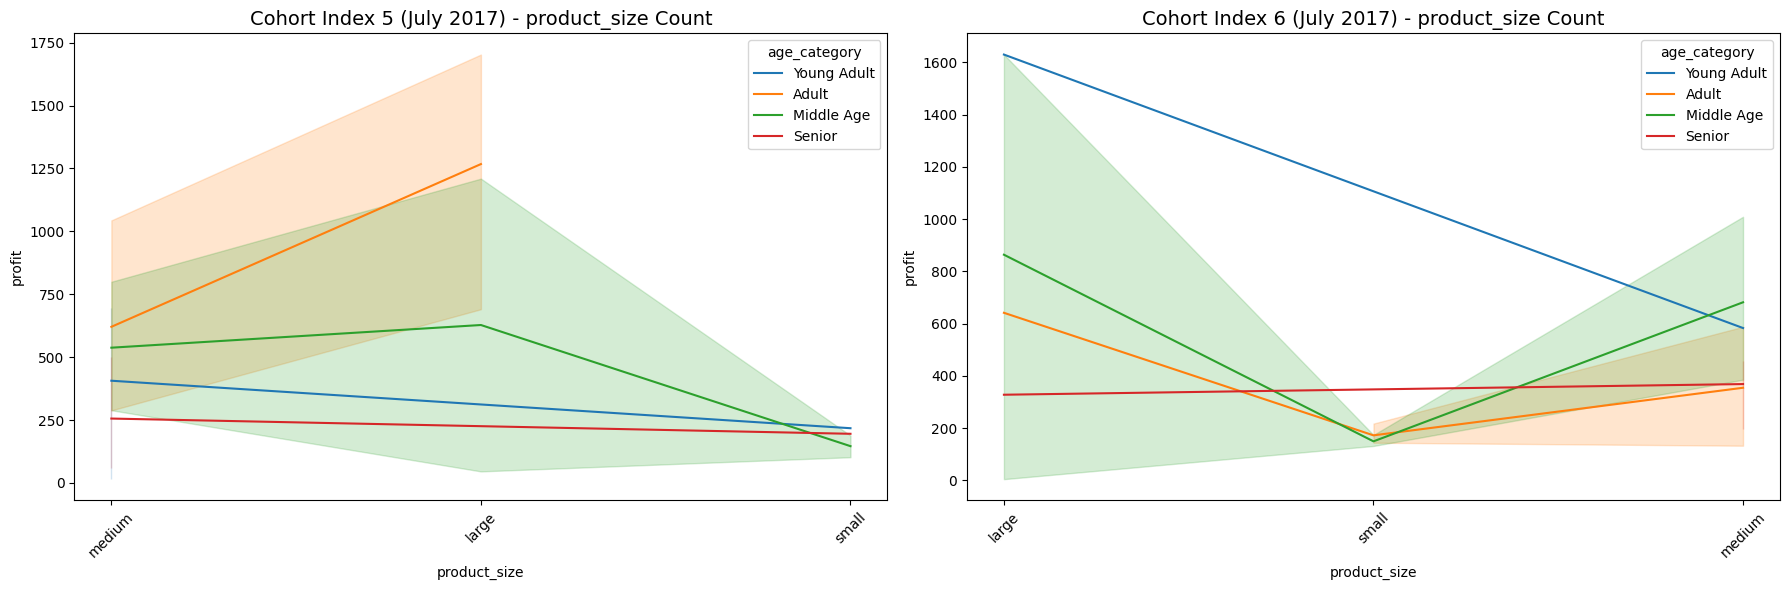

In [62]:
# plot count differences between df_48 and df_31
def plot_profit_comparison_age(df1, df2, title1, title2, column_name,subcat):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    # df1 Countplot
    sns.lineplot(data=df1, x=column_name, y='profit', hue=subcat, ax=axes[0])
    axes[0].set_title(f'{title1} - {column_name} Count', fontsize=14)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

    # df2 Countplot
    sns.lineplot(data=df2, x=column_name, y='profit', hue=subcat, ax=axes[1])
    axes[1].set_title(f'{title2} - {column_name} Count', fontsize=14)
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

    plt.tight_layout()
    plt.show()


# Apply the count comparison for each specified column
for column in ['state', 'brand','gender','product_class', 'job_industry_category', 'product_size']:
    plot_profit_comparison_age(df_48, df_31, title1="Cohort Index 5 (July 2017)", title2="Cohort Index 6 (July 2017)", column_name=column,subcat='age_category')

Based on the graphs, I notice the following:



*   List item
*   List item



# 4. RFM Analysis

In [63]:
# Assuming 'transaction_date' is the date of the transaction
now = dt.datetime(2017, 12, 31)  # Replace with the latest date in your data

rfm = Merged_df.groupby('customer_id').agg({
    'transaction_date': lambda x: (now - x.max()).days,  # Recency
    'transaction_id': 'count',  # Frequency
    'profit': 'sum'  # Monetary Value
})

# Rename the columns
rfm = rfm.rename(columns={
    'transaction_date': 'recency',
    'transaction_id': 'frequency',
    'profit': 'monetary'
})

# Calculate RFM scores (quantiles)
r_labels = range(5, 0, -1)
f_labels = range(1, 6)
m_labels = range(1, 6)

r_groups = pd.qcut(rfm['recency'], q=5, labels=r_labels)
f_groups = pd.qcut(rfm['frequency'], q=5, labels=f_labels)
m_groups = pd.qcut(rfm['monetary'], q=5, labels=m_labels)

rfm = rfm.assign(r=r_groups.values, f=f_groups.values, m=m_groups.values)

# Calculate RFM score (combine R, F, and M scores)
rfm['rfm_score'] = rfm[['r', 'f', 'm']].sum(axis=1)

# Analyze RFM segments
def rfm_segment(df):
  if df['rfm_score'] >= 12:
    return 'Champions'
  elif df['rfm_score'] >= 10:
    return 'Loyal Customers'
  elif df['rfm_score'] >= 8:
    return 'Potential Loyalists'
  elif df['rfm_score'] >= 6:
    return 'Promising'
  else:
    return 'Require Activation'

rfm['segment'] = rfm.apply(rfm_segment, axis=1)

# Print the RFM analysis results
print(rfm.head())
print(rfm.groupby('segment').agg({'recency':'mean','frequency':'mean','monetary':'mean'}))


             recency  frequency monetary  r  f  m  rfm_score  \
customer_id                                                    
1                  8         11  3018.09  5  5  3         13   
2                129          3  2226.26  1  1  2          4   
4                196          2   220.57  1  1  1          3   
5                 17          6  2394.94  4  3  2          9   
6                 65          5  3946.55  2  2  4          8   

                         segment  
customer_id                       
1                      Champions  
2             Require Activation  
4             Require Activation  
5            Potential Loyalists  
6            Potential Loyalists  
                        recency  frequency     monetary
segment                                                
Champions             22.223634   8.429479  5189.665909
Loyal Customers       41.460843   6.650602  3776.821943
Potential Loyalists   52.669630   5.435556  2898.364904
Promising             66.6

In [64]:
rfm.head()

,recency,frequency,monetary,r,f,m,rfm_score,segment
customer_id,,,,,,,,
1,8,11,3018.09,5,5,3,13,Champions
2,129,3,2226.26,1,1,2,4,Require Activation
4,196,2,220.57,1,1,1,3,Require Activation
5,17,6,2394.94,4,3,2,9,Potential Loyalists
6,65,5,3946.55,2,2,4,8,Potential Loyalists


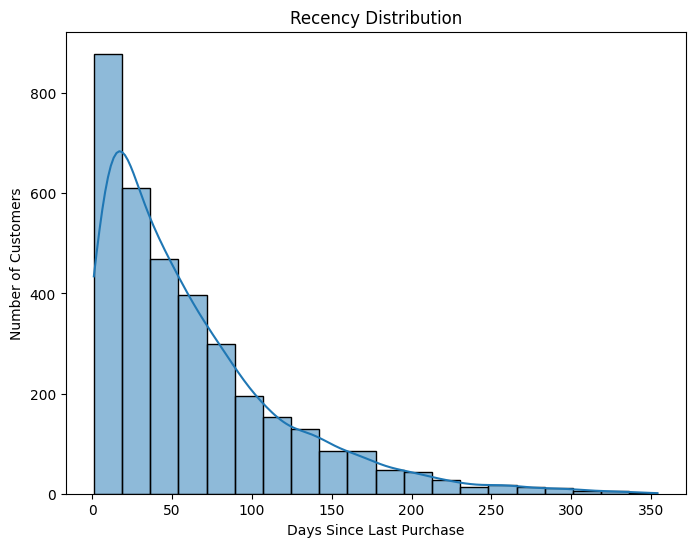

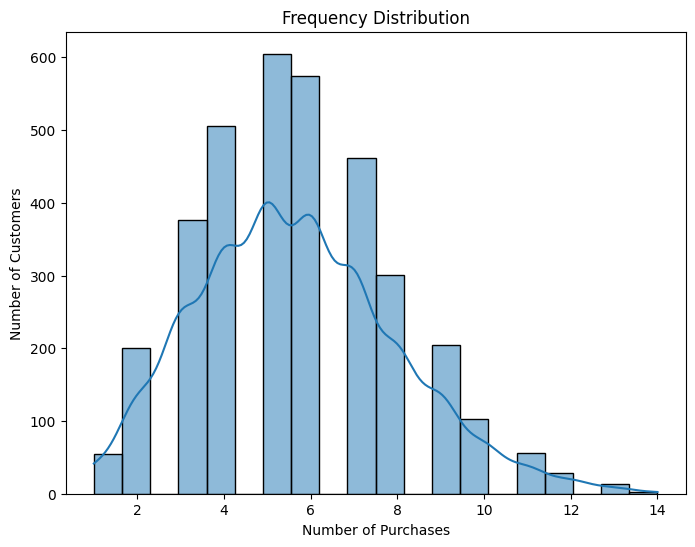

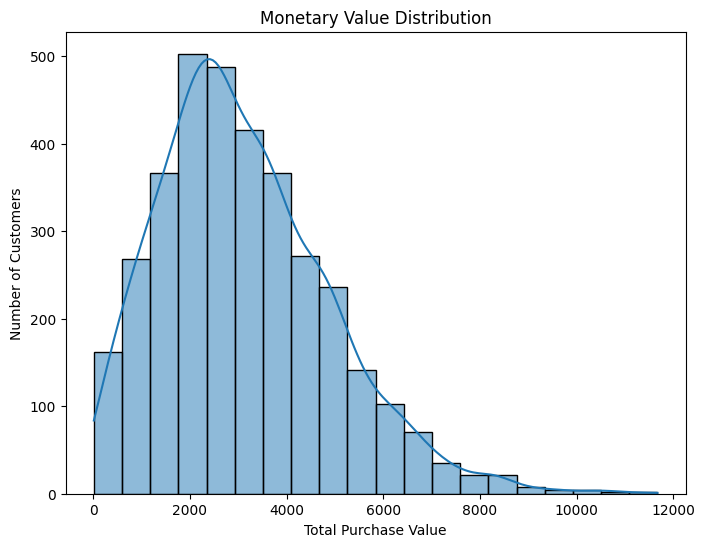

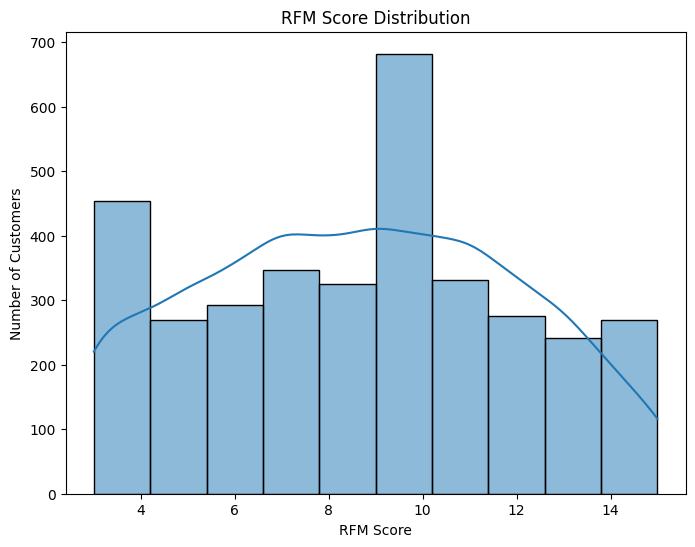

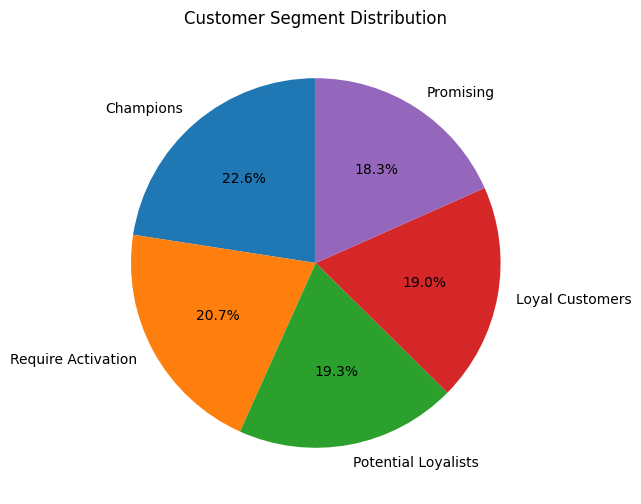

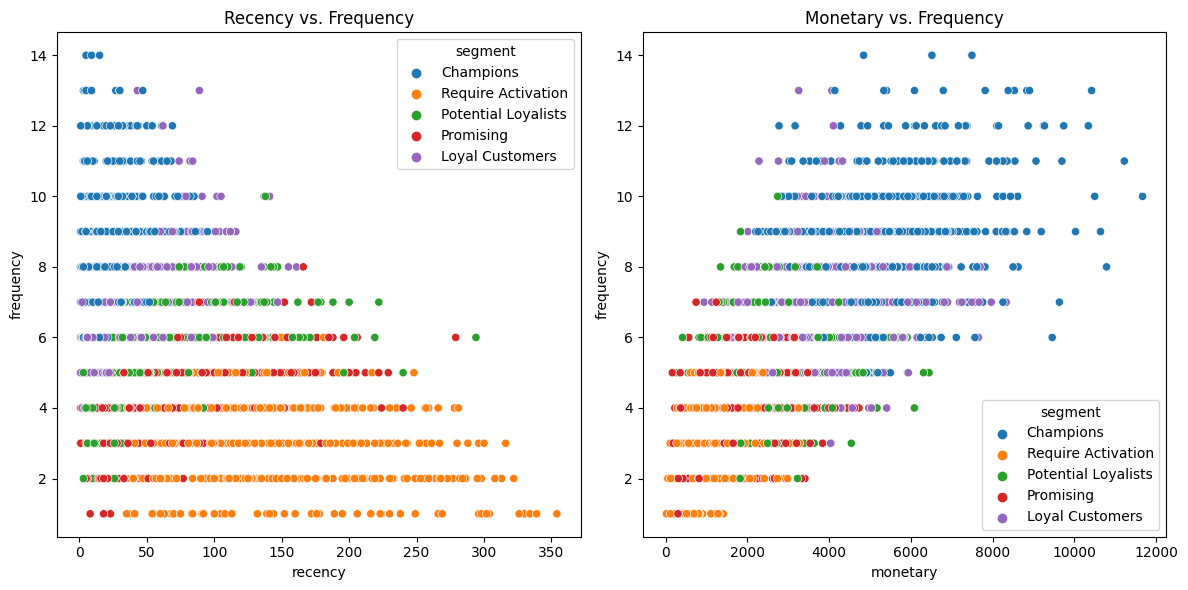

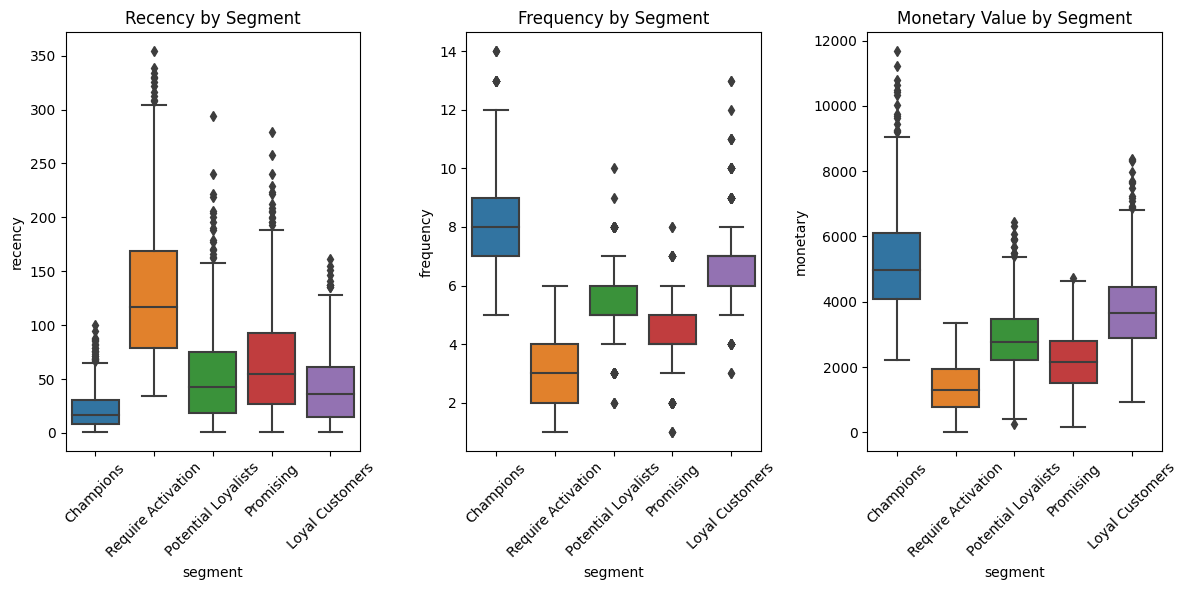

In [65]:
# Recency distribution
plt.figure(figsize=(8, 6))
sns.histplot(rfm['recency'], bins=20, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.show()

# Frequency distribution
plt.figure(figsize=(8, 6))
sns.histplot(rfm['frequency'], bins=20, kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Monetary distribution
plt.figure(figsize=(8, 6))
sns.histplot(rfm['monetary'], bins=20, kde=True)
plt.title('Monetary Value Distribution')
plt.xlabel('Total Purchase Value')
plt.ylabel('Number of Customers')
plt.show()

# RFM score distribution
plt.figure(figsize=(8, 6))
sns.histplot(rfm['rfm_score'], bins=10, kde=True)
plt.title('RFM Score Distribution')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.show()

# Segment distribution
plt.figure(figsize=(8, 6))
segment_counts = rfm['segment'].value_counts()
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Segment Distribution')
plt.show()

# Scatter plots for RFM relationships
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='recency', y='frequency', data=rfm, hue='segment')
plt.title('Recency vs. Frequency')

plt.subplot(1, 2, 2)
sns.scatterplot(x='monetary', y='frequency', data=rfm, hue='segment')
plt.title('Monetary vs. Frequency')
plt.tight_layout()
plt.show()

# Box plots for RFM scores within segments
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='segment', y='recency', data=rfm)
plt.title('Recency by Segment')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='segment', y='frequency', data=rfm)
plt.title('Frequency by Segment')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='segment', y='monetary', data=rfm)
plt.title('Monetary Value by Segment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


RFM on bothe df_48 and df_31

In [66]:
# Function to calculate RFM for a given dataframe
def calculate_rfm(df):
    rfm = df.groupby('customer_id').agg({
        'transaction_date': lambda x: (now - x.max()).days,  # Recency
        'transaction_id': 'count',  # Frequency
        'profit': 'sum'  # Monetary Value
    })

    # Rename columns for better readability
    rfm = rfm.rename(columns={
        'transaction_date': 'recency',
        'transaction_id': 'frequency',
        'profit': 'monetary'
    })

    return rfm

# RFM analysis for df_48 (Cohort Index 5)
rfm_48 = calculate_rfm(df_48)

# RFM analysis for df_31 (Cohort Index 6)
rfm_31 = calculate_rfm(df_31)

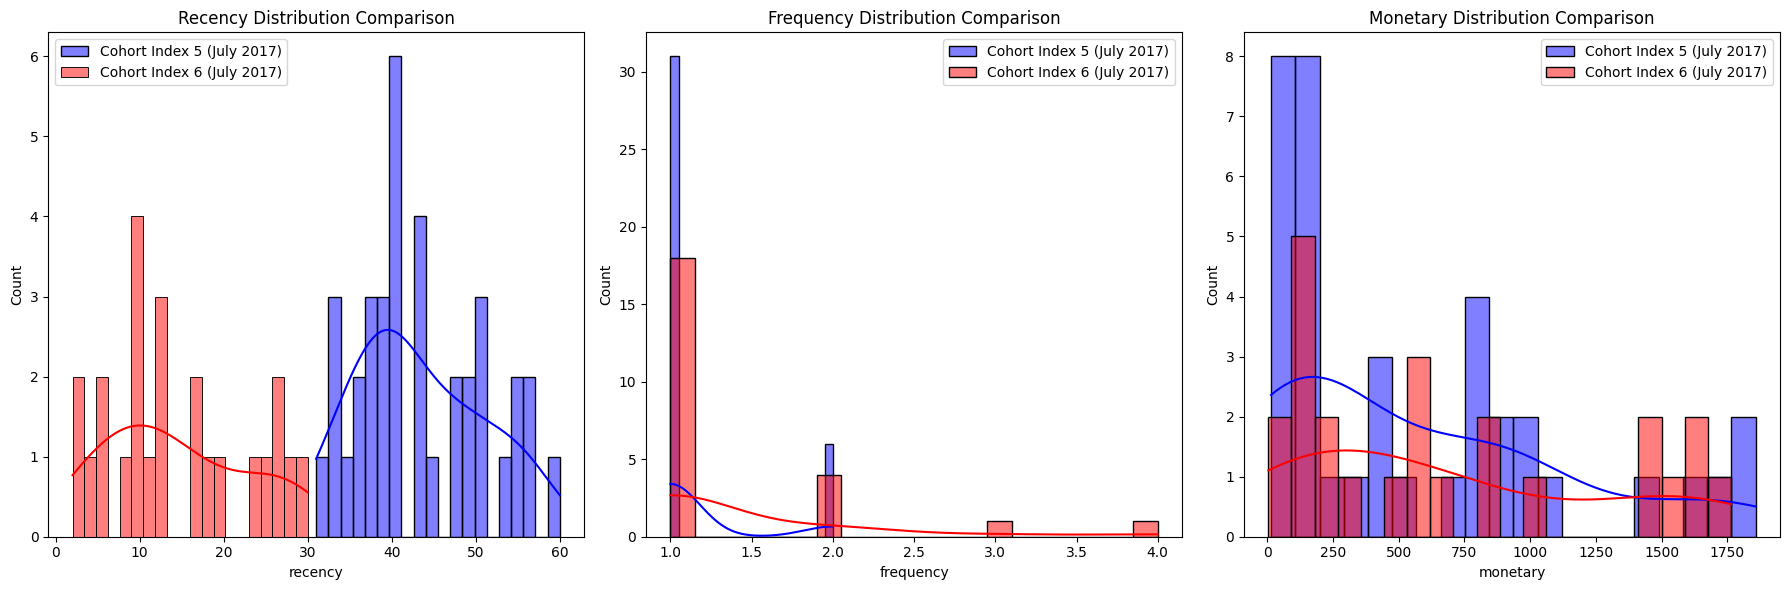

In [67]:
# Function to plot RFM distributions side by side for two DataFrames
def compare_rfm_distributions(rfm1, rfm2, title1, title2):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Recency distribution
    sns.histplot(rfm1['recency'], bins=20, kde=True, ax=axes[0], color='blue', label=title1)
    sns.histplot(rfm2['recency'], bins=20, kde=True, ax=axes[0], color='red', label=title2)
    axes[0].set_title('Recency Distribution Comparison')
    axes[0].legend()

    # Frequency distribution
    sns.histplot(rfm1['frequency'], bins=20, kde=True, ax=axes[1], color='blue', label=title1)
    sns.histplot(rfm2['frequency'], bins=20, kde=True, ax=axes[1], color='red', label=title2)
    axes[1].set_title('Frequency Distribution Comparison')
    axes[1].legend()

    # Monetary distribution
    sns.histplot(rfm1['monetary'], bins=20, kde=True, ax=axes[2], color='blue', label=title1)
    sns.histplot(rfm2['monetary'], bins=20, kde=True, ax=axes[2], color='red', label=title2)
    axes[2].set_title('Monetary Distribution Comparison')
    axes[2].legend()

    plt.tight_layout()
    plt.show()


# Compare RFM distributions for df_48 and df_31
compare_rfm_distributions(rfm_48, rfm_31, "Cohort Index 5 (July 2017)", "Cohort Index 6 (July 2017)")


In [68]:
rfm_48['segment'] = rfm.apply(rfm_segment, axis=1)
rfm_31['segment'] = rfm.apply(rfm_segment, axis=1)

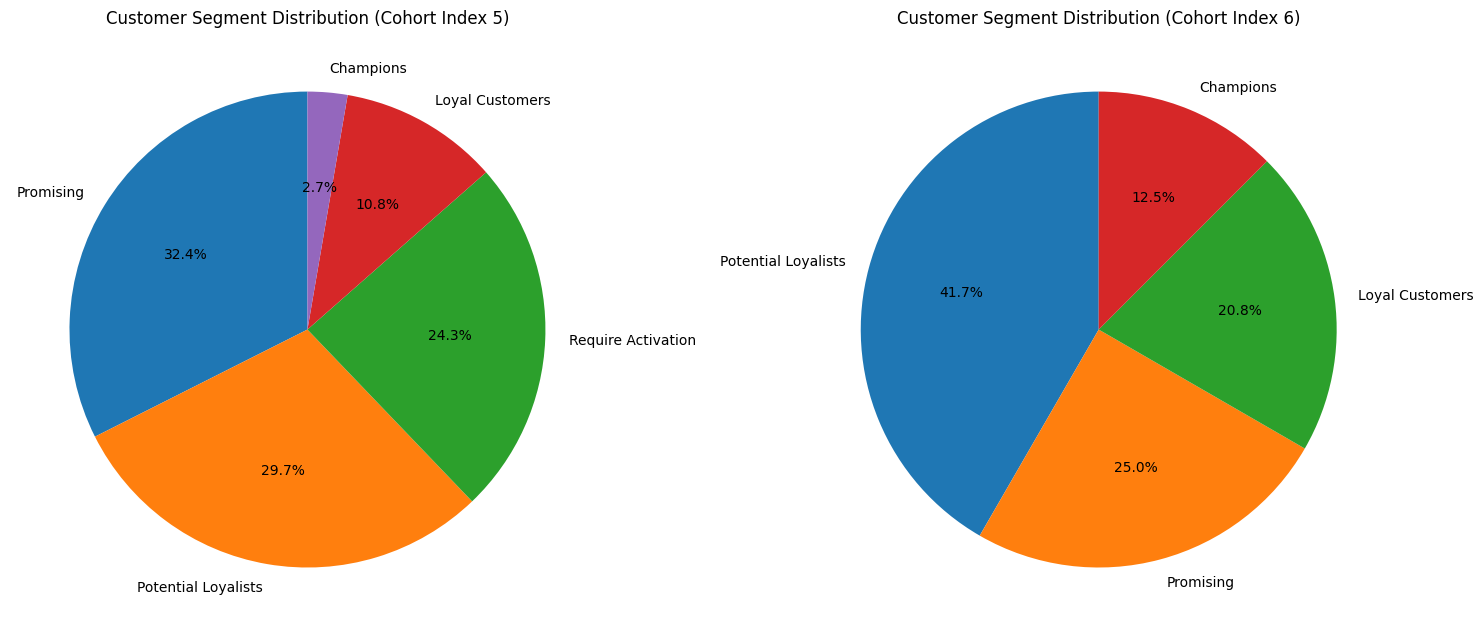

In [69]:
# Calculate segment counts for df_48 and df_31
segment_counts_48 = rfm_48['segment'].value_counts()
segment_counts_31 = rfm_31['segment'].value_counts()

# Create subplots for the pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot pie chart for df_48
axes[0].pie(segment_counts_48, labels=segment_counts_48.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Customer Segment Distribution (Cohort Index 5)')

# Plot pie chart for df_31
axes[1].pie(segment_counts_31, labels=segment_counts_31.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Customer Segment Distribution (Cohort Index 6)')

plt.tight_layout()
plt.show()
